In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_reduced_with_na|BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')



Toggle code

var_type (8079, 14)
Wall time: 44.3 s


In [2]:
BES_reduced_with_na[["Economic Left-Right","Social Liberal-Authoritarian"]] = pan_dataset_allr_values[['Economic: Left <-> Right{gaussian-ish}complete_fully','Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']]
BES_reduced_with_na["Age"] = pan_dataset_ages["Age_at_W10"]
waveless = list(search(BES_reduced_with_na,"^((?!W\d+).)*$").index)
endog_imm_vars = ["immigCultural","immigEcon","immigSelf"]

In [2]:
# search(BES_reduced_with_na,"blackEquality")

In [3]:
# %%time
# blackEquality_corr = BES_reduced_with_na.corrwith(BES_reduced_with_na["blackEqualityW6_W14__Gone much too far"])

In [4]:
# blackEquality_corr.dropna().sort_values().tail(50)

In [3]:
# BES_reduced_with_na

In [5]:
Treatment = "D8_10immigEcon_with_basis"
var_stub = "D8_10immigEcon"

var_list = ["D8_10immigEcon"]
var_stub_list = [var_stub,"immigEcon","immigCultural","immigSelf"]



In [7]:
temp = pd.get_dummies(BES_Panel["immigEconW8"],prefix="baseval").drop("baseval_Don't know",axis=1)

# temp["baseval"] = BES_reduced_with_na["immigEconW8__Good for economy"]
temp["constant"] = 1.0
BES_reduced_with_na[temp.columns] = temp

In [8]:
BES_reduced_with_na["D8_10immigEcon"] = (BES_reduced_with_na["immigEconW10__Good for economy"]) -\
                      (BES_reduced_with_na["immigEconW8__Good for economy"])


[13:56:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.28522
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:1.275
[2]	validation_0-rmse:1.26287
[3]	validation_0-rmse:1.25217
[4]	validation_0-rmse:1.24095
[5]	validation_0-rmse:1.22995
[6]	validation_0-rmse:1.21948
[7]	validation_0-rmse:1.21032
[8]	validation_0-rmse:1.20224
[9]	validation_0-rmse:1.19626
[10]	validation_0-rmse:1.18981
[11]	validation_0-rmse:1.18657
[12]	validation_0-rmse:1.18034
[13]	validation_0-rmse:1.17548
[14]	validation_0-rmse:1.17116
[15]	validation_0-rmse:1.16725
[16]	validation_0-rmse:1.16176
[17]	validation_0-rmse:1.15699
[18]	validation_0-rmse:1.15105
[19]	validation_0-rmse:1.14809
[20]	validation_0-rmse:1.14242
[21]	validation_0-rmse:1.13892
[22]	validation_0-rmse:1.1352
[23]	validation_0-rmse:1.13279
[24]	validation_0-rmse:1.1281
[25]	validation_0-rmse:1.12404
[26]	valida

[255]	validation_0-rmse:1.04465
[256]	validation_0-rmse:1.04458
[257]	validation_0-rmse:1.04478
[258]	validation_0-rmse:1.04473
[259]	validation_0-rmse:1.04463
[260]	validation_0-rmse:1.04494
[261]	validation_0-rmse:1.04489
[262]	validation_0-rmse:1.04479
[263]	validation_0-rmse:1.04466
[264]	validation_0-rmse:1.04475
[265]	validation_0-rmse:1.04461
[266]	validation_0-rmse:1.0445
[267]	validation_0-rmse:1.04445
[268]	validation_0-rmse:1.04459
[269]	validation_0-rmse:1.04448
[270]	validation_0-rmse:1.04436
Stopping. Best iteration:
[219]	validation_0-rmse:1.04347

MSE: 1.09, MAE: 0.77, EV: 0.35, R2: 0.35
[14:10:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


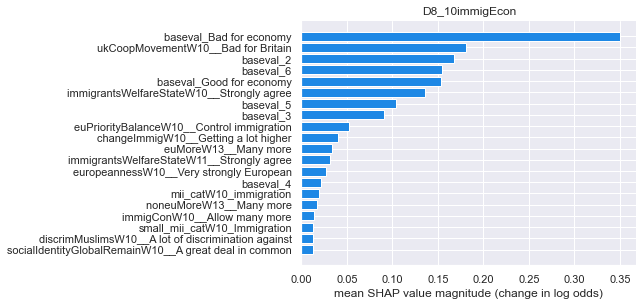

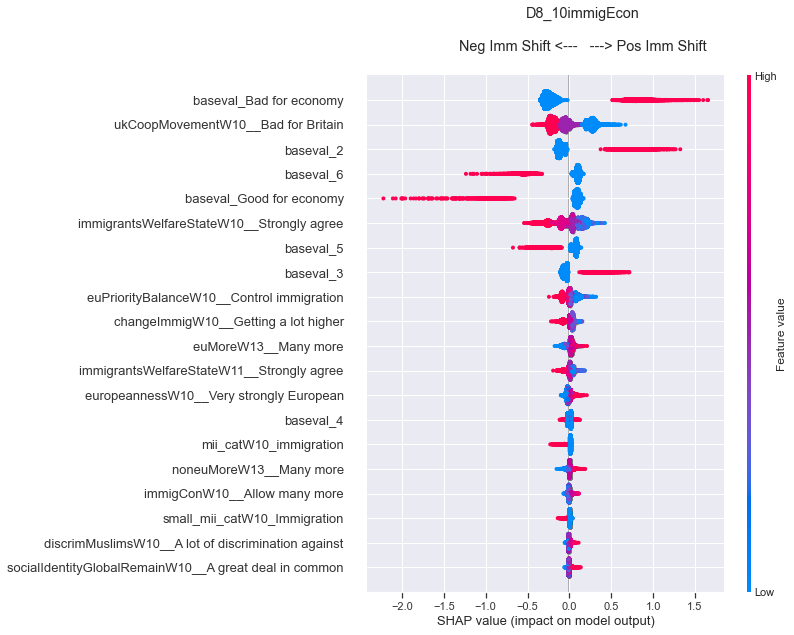

Wall time: 33min 12s


(<shap.explainers.tree.TreeExplainer at 0xc419308>,
 array([[ 0.        ,  0.        ,  0.        , ...,  0.11608671,
          0.09732102,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.10658664,
          0.09547708,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.8833826 ,
          0.06481348,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.08796766,
          0.07794596,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.09296983,
          0.08098631,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.122004  ,
          0.12074557,  0.        ]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutUKGeneralW4__Very likely that I will vote',
        'turnoutUKGeneralW5__Very likely that I will vote',
      

In [9]:
%%time
colname = "D8_10immigEcon"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,use_mean_weights=True,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nNeg Imm Shift <---   ---> Pos Imm Shift")

[0]	validation_0-rmse:1.2794
Will train until validation_0-rmse hasn't improved in 50.0 rounds.
[1]	validation_0-rmse:1.26704
[2]	validation_0-rmse:1.2537
[3]	validation_0-rmse:1.24497
[4]	validation_0-rmse:1.23596
[5]	validation_0-rmse:1.23057
[6]	validation_0-rmse:1.22398
[7]	validation_0-rmse:1.21818
[8]	validation_0-rmse:1.20789
[9]	validation_0-rmse:1.1993
[10]	validation_0-rmse:1.19091
[11]	validation_0-rmse:1.18592
[12]	validation_0-rmse:1.17917
[13]	validation_0-rmse:1.17669
[14]	validation_0-rmse:1.17303
[15]	validation_0-rmse:1.16972
[16]	validation_0-rmse:1.16407
[17]	validation_0-rmse:1.15924
[18]	validation_0-rmse:1.1554
[19]	validation_0-rmse:1.15183
[20]	validation_0-rmse:1.14632
[21]	validation_0-rmse:1.14461
[22]	validation_0-rmse:1.14309
[23]	validation_0-rmse:1.14059
[24]	validation_0-rmse:1.13783
[25]	validation_0-rmse:1.13319
[26]	validation_0-rmse:1.12988
[27]	validation_0-rmse:1.12659
[28]	validation_0-rmse:1.12306
[29]	validation_0-rmse:1.12142
[30]	validation_0

[259]	validation_0-rmse:1.04901
[260]	validation_0-rmse:1.04906
[261]	validation_0-rmse:1.04918
[262]	validation_0-rmse:1.04924
[263]	validation_0-rmse:1.04917
[264]	validation_0-rmse:1.04902
[265]	validation_0-rmse:1.04884
[266]	validation_0-rmse:1.04887
[267]	validation_0-rmse:1.04885
[268]	validation_0-rmse:1.04878
[269]	validation_0-rmse:1.04882
[270]	validation_0-rmse:1.04894
[271]	validation_0-rmse:1.04886
[272]	validation_0-rmse:1.04899
[273]	validation_0-rmse:1.04894
[274]	validation_0-rmse:1.04888
[275]	validation_0-rmse:1.04895
[276]	validation_0-rmse:1.04869
[277]	validation_0-rmse:1.04869
[278]	validation_0-rmse:1.04866
[279]	validation_0-rmse:1.04846
[280]	validation_0-rmse:1.04848
[281]	validation_0-rmse:1.0485
[282]	validation_0-rmse:1.04853
[283]	validation_0-rmse:1.04864
[284]	validation_0-rmse:1.04852
[285]	validation_0-rmse:1.0486
[286]	validation_0-rmse:1.04861
[287]	validation_0-rmse:1.04851
[288]	validation_0-rmse:1.04851
[289]	validation_0-rmse:1.04854
[290]	vali

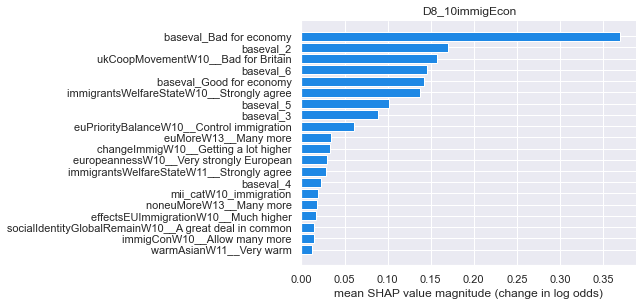

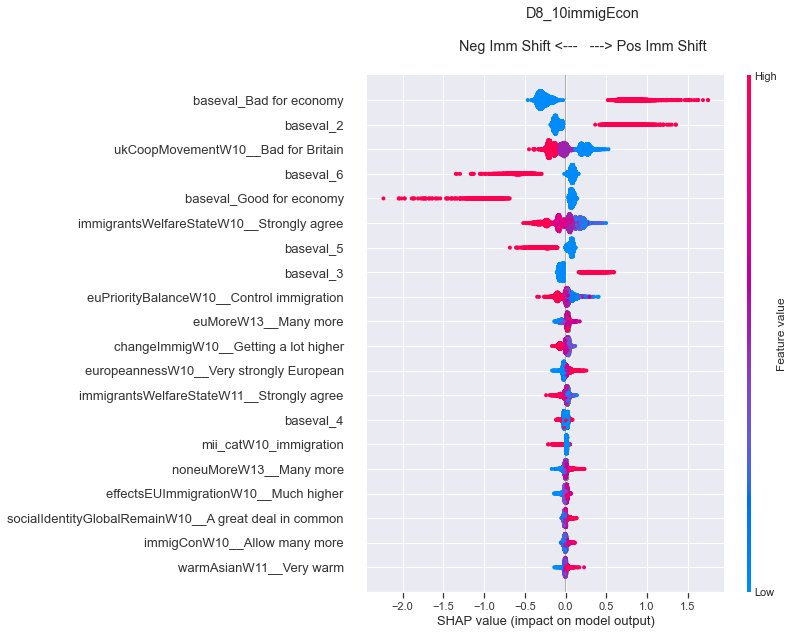

Wall time: 11min 30s


(<shap.explainers.tree.TreeExplainer at 0xc70ccc8>,
 array([[-7.0908386e-06, -2.7767259e-05,  0.0000000e+00, ...,
          9.9142522e-02,  9.4742060e-02,  0.0000000e+00],
        [-1.2739611e-05,  1.3089693e-05,  0.0000000e+00, ...,
          9.1415308e-02,  7.6237403e-02,  0.0000000e+00],
        [ 5.9778740e-06, -2.0021285e-05,  0.0000000e+00, ...,
         -9.0535569e-01,  6.5163046e-02,  0.0000000e+00],
        ...,
        [ 5.1932898e-06,  1.3089693e-05,  0.0000000e+00, ...,
          7.0606381e-02,  7.5892881e-02,  0.0000000e+00],
        [ 5.1932898e-06,  1.3089693e-05,  0.0000000e+00, ...,
          8.0413587e-02,  7.6780528e-02,  0.0000000e+00],
        [ 5.1932898e-06,  1.3089693e-05,  0.0000000e+00, ...,
          9.6284248e-02,  9.7102329e-02,  0.0000000e+00]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutUK

In [4]:
%%time
Treatment = "D8_10immigEcon_with_basis"
var_stub = "D8_10immigEcon"

var_list = ["D8_10immigEcon"]
var_stub_list = [var_stub,"immigEcon","immigCultural","immigSelf"]

temp = pd.get_dummies(BES_Panel["immigEconW8"],prefix="baseval").drop("baseval_Don't know",axis=1)

temp["constant"] = 1.0
BES_reduced_with_na[temp.columns] = temp

BES_reduced_with_na["D8_10immigEcon"] = (BES_reduced_with_na["immigEconW10__Good for economy"]) -\
                      (BES_reduced_with_na["immigEconW8__Good for economy"])


colname = "D8_10immigEcon"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            use_specific_weights=BES_Panel["wt_new_W10"], 
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nNeg Imm Shift <---   ---> Pos Imm Shift")

In [50]:
search(BES_Panel,"controlImmig")

controlImmigW8      8405
controlImmigW9     30036
controlImmigW10    30237
controlImmigW11    30956
controlImmigW13    31136
controlImmigW14    31063
controlImmigW15    30842
controlImmigW16    37959
controlImmigW17    34366
dtype: int64

In [51]:
search(BES_reduced_with_na,"controlImmig")

controlImmigW8__Complete control         8014
controlImmigW9__Complete control        27593
controlImmigW10__Complete control       26524
controlImmigW11__Complete control       28213
controlImmigW13__Complete control       27785
controlImmigW14__Complete control       27706
controlImmigW15__Complete control       27256
controlImmigW16__Complete control       33430
controlImmigW17__Complete control       30783
D16_17controlImmig__Complete control    18482
D8_9controlImmig__Complete control       6175
D9_10controlImmig__Complete control     16208
D10_11controlImmig__Complete control    18384
D11_13controlImmig__Complete control    20907
D11_14controlImmig__Complete control    16592
D11_15controlImmig__Complete control    14250
D13_14controlImmig__Complete control    17082
D13_15controlImmig__Complete control    14640
D14_15controlImmig__Complete control    16639
D15_16controlImmig__Complete control    16461
D10_13controlImmig__Complete control    17306
D10_14controlImmig__Complete contr

In [ ]:
# missing
# importance_type='gain'
# gamma *and* min_split_loss

importance_type (string, default "gain") – The feature importance type for the feature_importances_ property:
    either “gain”, “weight”, “cover”, “total_gain” or “total_cover”.



In [13]:
BES_reduced_with_na["D8_10immigEcon"] = BES_reduced_with_na["D8_10immigEcon"].abs()*BES_reduced_with_na["D8_10immigEcon"]

[14:37:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.28522
Will train until validation_0-rmse hasn't improved in 21.900000000000002 rounds.
[1]	validation_0-rmse:1.275
[2]	validation_0-rmse:1.26287
[3]	validation_0-rmse:1.25217
[4]	validation_0-rmse:1.24095
[5]	validation_0-rmse:1.22995
[6]	validation_0-rmse:1.21948
[7]	validation_0-rmse:1.21032
[8]	validation_0-rmse:1.20224
[9]	validation_0-rmse:1.19626
[10]	validation_0-rmse:1.18981
[11]	validation_0-rmse:1.18657
[12]	validation_0-rmse:1.18034
[13]	validation_0-rmse:1.17548
[14]	validation_0-rmse:1.17116
[15]	validation_0-rmse:1.16725
[16]	validation_0-rmse:1.16176
[17]	validation_0-rmse:1.15699
[18]	validation_0-rmse:1.15105
[19]	validation_0-rmse:1.14809
[20]	validation_0-rmse:1.14242
[21]	validation_0-rmse:1.13892
[22]	validation_0-rmse:1.1352
[23]	validation_0-rmse:1.13279
[24]	validation_0-rmse:1.1281
[25]	validation_0-rmse:1.12404
[26]	valida

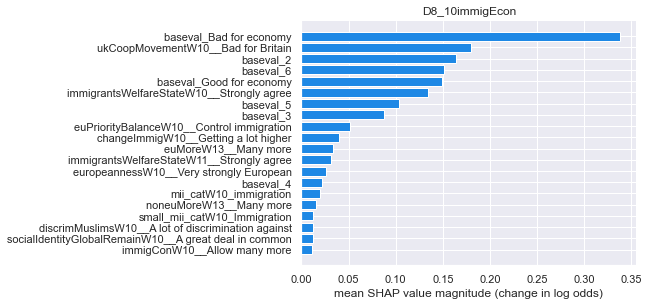

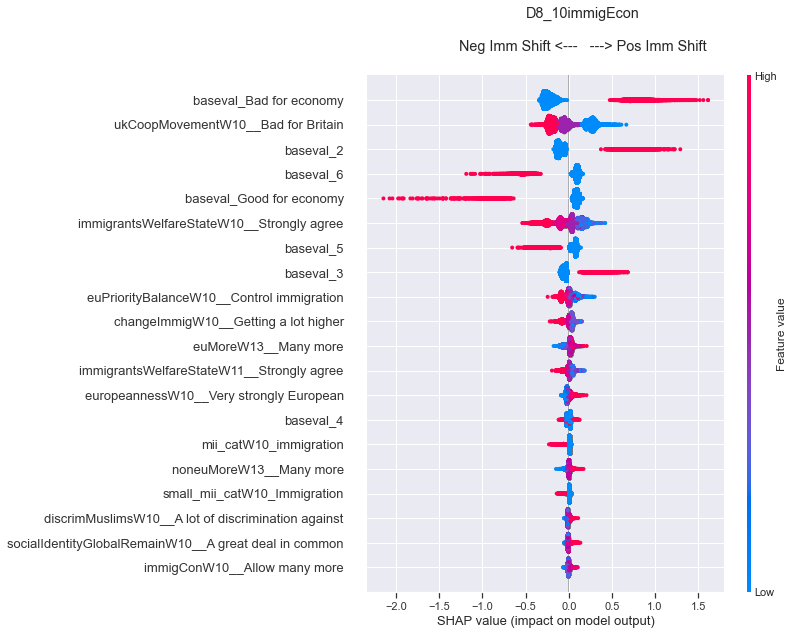

Wall time: 25min 41s


(<shap.explainers.tree.TreeExplainer at 0x6356d388>,
 array([[ 0.        ,  0.        ,  0.        , ...,  0.11296251,
          0.09592932,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.10509006,
          0.0931106 ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.84988314,
          0.06461152,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.08602198,
          0.07453869,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.09252245,
          0.07820954,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.11886267,
          0.11873872,  0.        ]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutUKGeneralW4__Very likely that I will vote',
        'turnoutUKGeneralW5__Very likely that I will vote',
     

In [12]:
%%time
colname = "D8_10immigEcon"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nNeg Imm Shift <---   ---> Pos Imm Shift")

In [18]:
# 10 - 30s, r/ev=.15
# 5 - 60s, r/ev=.22
# 3 - 90s, r/ev =.24
# 2 - 120s, r/ev = .22
# 1 - 260s, r/ev = .25
BES_reduced_with_na.shape

(97006, 9531)

In [12]:
memory_use(locs = locals().items())

           BES_reduced_with_na:   3.4GiB
                     BES_Panel: 944.5MiB
                      var_type:   6.5MiB
                            __:   1.5MiB
                          temp:   1.5MiB
                            _9:   1.5MiB
                cat_dictionary: 288.1KiB
             new_old_col_names: 288.1KiB
             old_new_col_names: 144.1KiB
             BES_file_manifest:  58.7KiB


In [13]:
gc.collect()

20

In [10]:
nulls = BES_reduced_with_na[BES_reduced_with_na["D8_10immigEcon"].notnull()].notnull().sum()

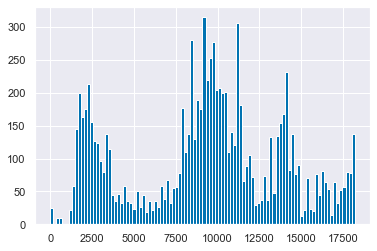

In [14]:
nulls.hist(bins=100)

In [16]:
nulls[nulls>5000]

turnoutUKGeneralW1__Very likely that I will vote     9111
turnoutUKGeneralW2__Very likely that I will vote     9788
turnoutUKGeneralW3__Very likely that I will vote     9705
turnoutUKGeneralW4__Very likely that I will vote    11210
turnoutUKGeneralW5__Very likely that I will vote     9880
                                                    ...  
immigEconW8_4                                       18197
immigEconW8_5                                       18197
immigEconW8_6                                       18197
immigEconW8_Good for economy                        18197
immigEconW8_Don't know                              18197
Length: 7373, dtype: int64

In [37]:
notnulls = BES_reduced_with_na.notnull().sum()

In [21]:
%%time
sums = BES_reduced_with_na.sum()

Wall time: 3min 42s


 0.0     7897
 1.0     4565
-1.0     2078
 4.0     1781
 9.0      720
-4.0      511
 16.0     247
-9.0      168
 25.0      65
 36.0      64
-16.0      63
-36.0      20
-25.0      18
Name: D8_10immigEcon, dtype: int64

In [47]:
%%time
zeroes = (BES_reduced_with_na==0).sum()

Wall time: 3.17 s


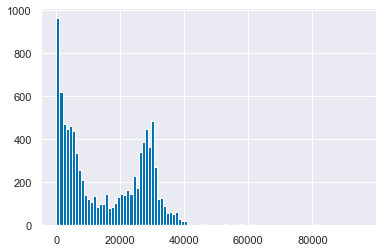

In [48]:
zeroes.hist(bins=100)

In [58]:
nonzeroes = notnulls-zeroes
nonzeroes[nonzeroes<=200]

bestOnMIIW1_Plaid Cymru                                         81
generalElectionVoteW2_British National Party (BNP)             120
generalElectionVoteW3_British National Party (BNP)             131
generalElectionVoteW4_British National Party (BNP)              78
generalElectionVoteUnsqueezeW4_British National Party (BNP)     50
                                                              ... 
partyContactLD_4W13_Yes                                        184
referendumContact_9W2_Yes                                      164
paperDays_2_111W18_Yes                                         168
partyContactLab_4W2_Yes                                        195
referendumContact_9W3_Yes                                      200
Length: 1293, dtype: int64

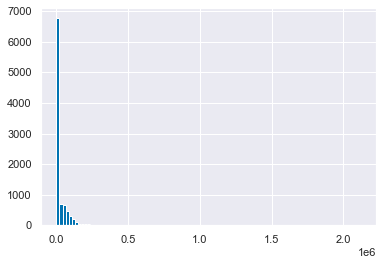

In [41]:
sums.hist(bins=100)

In [45]:
sums[sums<=300000].sort_values()

cogempathyIRTW14                                            -69.131851
affempathyIRTW14                                            -19.265257
zeroSumIRTW14                                                 0.042665
mii_catW13_Referendum unspecified                             1.000000
mii_catW6_domestic emergency                                  1.000000
                                                             ...      
mapAsianW3                                               280879.000000
warmRichW11__Very warm                                   290472.000000
EUIntegrationBrexitW16__Protect our independence         291372.000000
agreePartyW17                                            293484.000000
scotRefExpectationTurnoutW1__100% of people will vote    298707.000000
Length: 9416, dtype: float32

In [36]:
sums[(sums<100)&(sums>=1)].sort_values().tail(50)

p_past_vote_2017_British National Party (BNP)                            1.0
mii_catW6_domestic emergency                                             1.0
motherVoteW3W14_W17_8.0                                                  1.0
mii_catW13_Referendum unspecified                                        1.0
ns_secW6W7W8W9_L8.2 Employers in small establishments in agriculture     1.0
                                                                        ... 
knowMPW2_John Robertson                                                 99.0
mii_catW4_nat ident, goals-loss                                         99.0
p_ethnicityW7_Black Caribbean                                           99.0
partyIdSqueezeTIGW15_Scottish National Party (SNP)                      99.0
p_ethnicityW2_Pakistani                                                 99.0
Length: 770, dtype: float32

In [26]:
search(BES_Panel,"profiles")

profiles_newspaper2W16    13775
profiles_newspaper2W17    34366
dtype: int64

In [ ]:
## delete variables

profiles_newspaper2W16    13775
profiles_newspaper2W17    34366

In [ ]:
## How about amalgamating all the variables that span waves?

In [ ]:
# gender_Female 916 gaps
# paperDays

In [26]:
def add_pairs(wave_pair):
    pair1_cols = [x for x in search(df,wave_pair[0]).index if x.replace(wave_pair[0],wave_pair[1]) in df.columns]
    pair2_cols = [x.replace(wave_pair[0],wave_pair[1]) for x in pair1_cols]

    prefix = "D"+"_".join([x.replace("W","") for x in wave_pair])
    delta_df = pd.DataFrame(df[pair2_cols].values - df[pair1_cols].values,
                            columns = [prefix+x.replace(wave_pair[0],"") for x in pair1_cols])
    if pair1_cols!=[]:
        biggest_dtype = df[pair1_cols].dtypes.value_counts().index[-1].name
        biggest_dtype = "Int64" # nino_df screws this up by introducing floats!
        delta_df = delta_df.astype(biggest_dtype).astype('float32')
        df[delta_df.columns] = delta_df
        
treatment_dict = {}


In [38]:
# immigEcon, immigCultural, immigSelf
# immigrantsWelfareState, ukCoopMovement, changeImmig, controlImmig
# trustMPs,likeFarage
# EUIntegrationSelf,europeanness

BES_reduced_with_na["trustMPsW8__A great deal of trust"]=BES_Panel["trustMPsW8"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

[13:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.33103
Will train until validation_0-rmse hasn't improved in 18.3 rounds.
[1]	validation_0-rmse:1.32415
[2]	validation_0-rmse:1.31218
[3]	validation_0-rmse:1.30058
[4]	validation_0-rmse:1.29165
[5]	validation_0-rmse:1.28228
[6]	validation_0-rmse:1.2781
[7]	validation_0-rmse:1.2703
[8]	validation_0-rmse:1.26306
[9]	validation_0-rmse:1.2557
[10]	validation_0-rmse:1.24995
[11]	validation_0-rmse:1.24361
[12]	validation_0-rmse:1.23655
[13]	validation_0-rmse:1.22987
[14]	validation_0-rmse:1.22436
[15]	validation_0-rmse:1.2185
[16]	validation_0-rmse:1.21403
[17]	validation_0-rmse:1.21067
[18]	validation_0-rmse:1.20718
[19]	validation_0-rmse:1.20255
[20]	validation_0-rmse:1.19868
[21]	validation_0-rmse:1.19518
[22]	validation_0-rmse:1.19086
[23]	validation_0-rmse:1.18868
[24]	validation_0-rmse:1.1839
[25]	validation_0-rmse:1.18117
[26]	validation_0-rmse:1.1

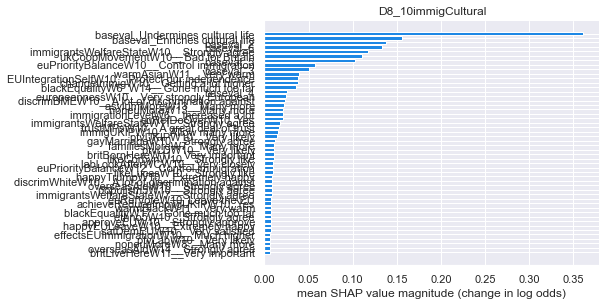

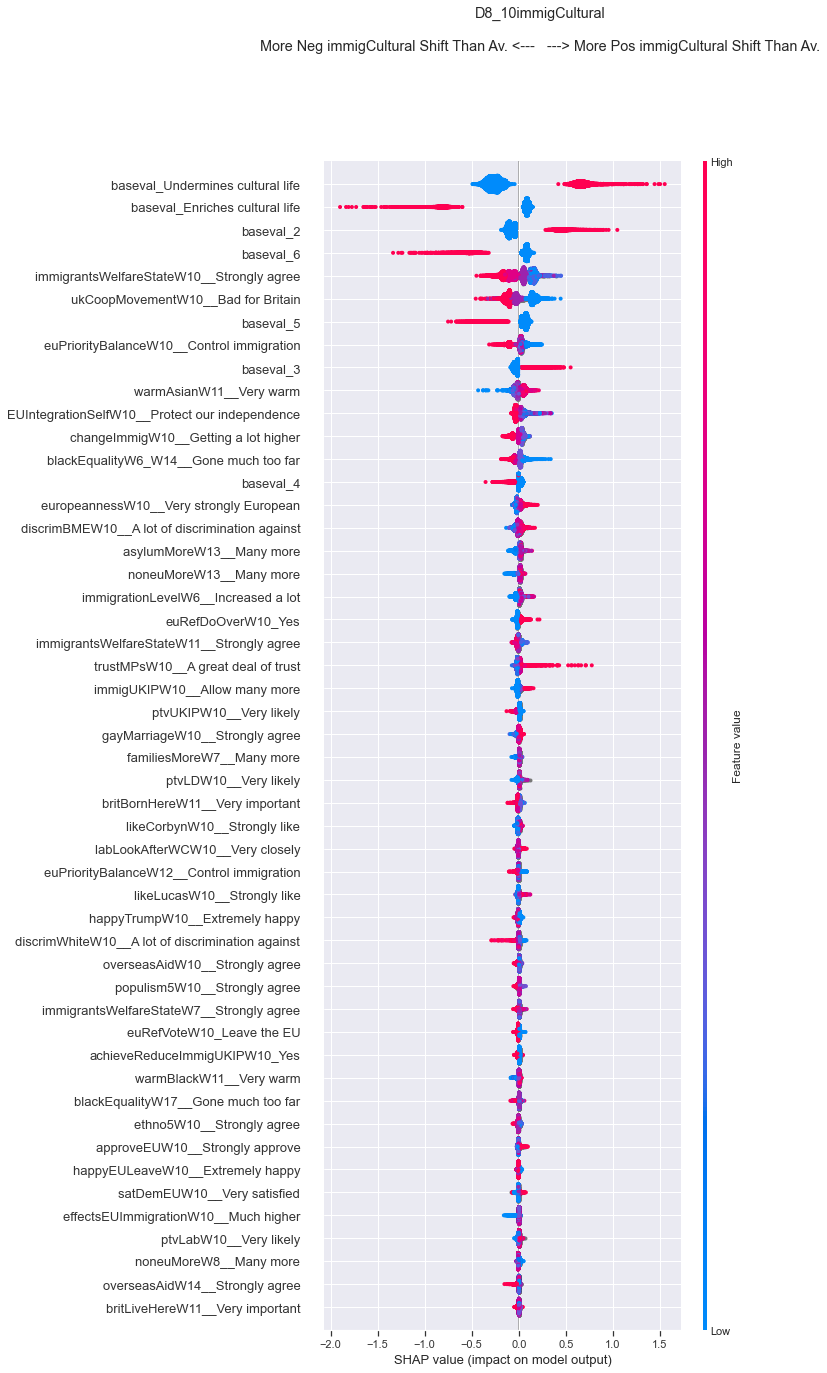

Wall time: 28min 32s


In [17]:
%%time
## target = D7_8immigEcon

for base in ["immigEcon", "immigCultural", "immigSelf", "immigrantsWelfareState", "ukCoopMovement",
             "changeImmig", "controlImmig", "trustMPs", "likeFarage","EUIntegrationSelf","europeanness"]:

    
# base = "immigCultural"

    wno1 = "8"
    wno2 = "10"



    Treatment = "new_sequence_D"+wno1+"_"+wno2+base
    wave_vars = list(search(BES_reduced_with_na,"|".join( ["W"+wno1,"W"+wno2,"W9"] ) ).index)

    # df = BES_reduced_with_na[waveless+].copy()
    df = BES_reduced_with_na.copy()


    var1 = match(BES_reduced_with_na,base+"W"+wno1).index[0]
    var2 = match(BES_reduced_with_na,base+"W"+wno2).index[0]

    temp = pd.get_dummies(BES_Panel[base+"W"+wno1],prefix="baseval").drop("baseval_Don't know",axis=1)

    # df["constant"] = 1.0
    df[temp.columns] = temp

    mask = BES_reduced_with_na[var1].notnull() & BES_reduced_with_na[var2].notnull()

    var_stub = "D"+wno1+"_"+wno2+base

    var_list = [var_stub]
    var_stub_list = [var_stub,base]
    
    if base in endog_imm_vars:
        var_stub_list.extend(endog_imm_vars)



    add_pairs(["W"+wno1,"W"+wno2])
    add_pairs(["W9","W10"])
    add_pairs(["W8","W9"])

    df[var_stub] = (BES_reduced_with_na[var2]) -\
                          (BES_reduced_with_na[var1])[mask]  


    (explainer, shap_values, train_columns, alg) = xgboost_run(subdir=Treatment,dataset=df,
                                                          var_list=var_list,var_stub_list=var_stub_list,use_mean_weights=True,
                                                          min_features = min(BES_reduced_with_na.shape[1]-1,50),
               title = var_stub+"\n\nMore Neg "+base+" Shift Than Av. <---   ---> More Pos "+base+" Shift Than Av.", Treatment=Treatment)

    treatment_dict[Treatment]  =shap_array(shap_values, train_columns, threshold = .1, min_features = 50)


[09:20:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.22764
Will train until validation_0-rmse hasn't improved in 11.5 rounds.
[1]	validation_0-rmse:1.21603
[2]	validation_0-rmse:1.20454
[3]	validation_0-rmse:1.19862
[4]	validation_0-rmse:1.19068
[5]	validation_0-rmse:1.18228
[6]	validation_0-rmse:1.1703
[7]	validation_0-rmse:1.16146
[8]	validation_0-rmse:1.15522
[9]	validation_0-rmse:1.14806
[10]	validation_0-rmse:1.14167
[11]	validation_0-rmse:1.13452
[12]	validation_0-rmse:1.12667
[13]	validation_0-rmse:1.11977
[14]	validation_0-rmse:1.11509
[15]	validation_0-rmse:1.10873
[16]	validation_0-rmse:1.10359
[17]	validation_0-rmse:1.10075
[18]	validation_0-rmse:1.09805
[19]	validation_0-rmse:1.09341
[20]	validation_0-rmse:1.08773
[21]	validation_0-rmse:1.08482
[22]	validation_0-rmse:1.08358
[23]	validation_0-rmse:1.08191
[24]	validation_0-rmse:1.07802
[25]	validation_0-rmse:1.07564
[26]	validation_0-rmse

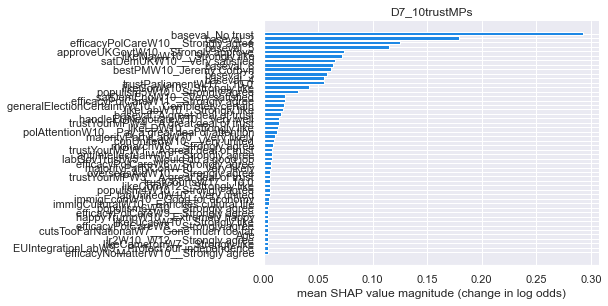

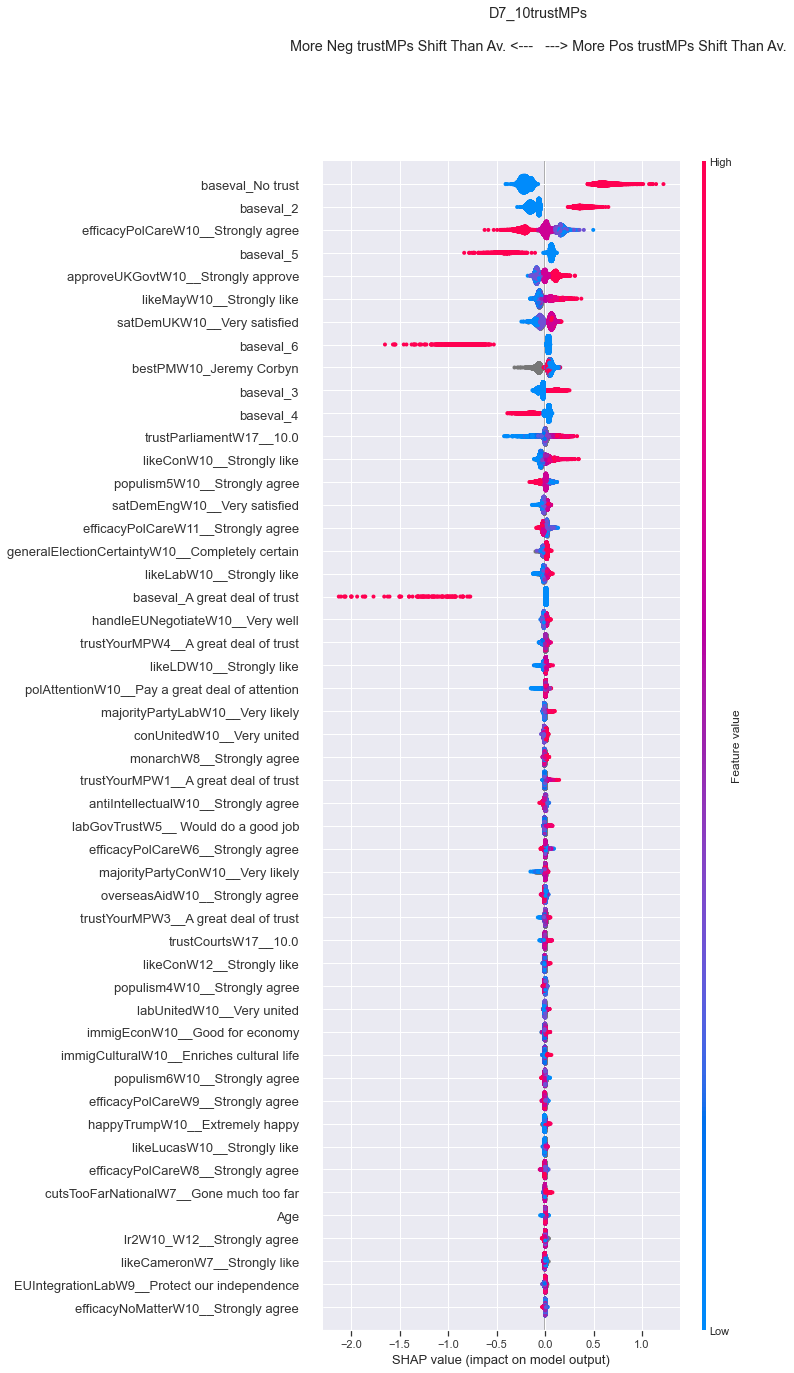

[09:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.04046
Will train until validation_0-rmse hasn't improved in 11.3 rounds.
[1]	validation_0-rmse:2.01581
[2]	validation_0-rmse:1.98466
[3]	validation_0-rmse:1.96097
[4]	validation_0-rmse:1.92818
[5]	validation_0-rmse:1.9019
[6]	validation_0-rmse:1.87539
[7]	validation_0-rmse:1.84285
[8]	validation_0-rmse:1.82893
[9]	validation_0-rmse:1.80461
[10]	validation_0-rmse:1.78086
[11]	validation_0-rmse:1.76827
[12]	validation_0-rmse:1.75166
[13]	validation_0-rmse:1.73804
[14]	validation_0-rmse:1.72607
[15]	validation_0-rmse:1.70464
[16]	validation_0-rmse:1.69243
[17]	validation_0-rmse:1.67769
[18]	validation_0-rmse:1.66347
[19]	validation_0-rmse:1.64851
[20]	validation_0-rmse:1.63233
[21]	validation_0-rmse:1.62134
[22]	validation_0-rmse:1.6142
[23]	validation_0-rmse:1.60482
[24]	validation_0-rmse:1.59479
[25]	validation_0-rmse:1.58553
[26]	validation_0-rmse:

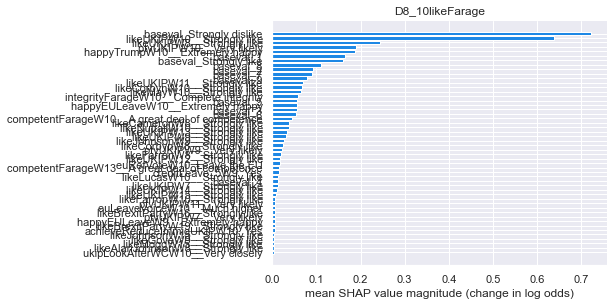

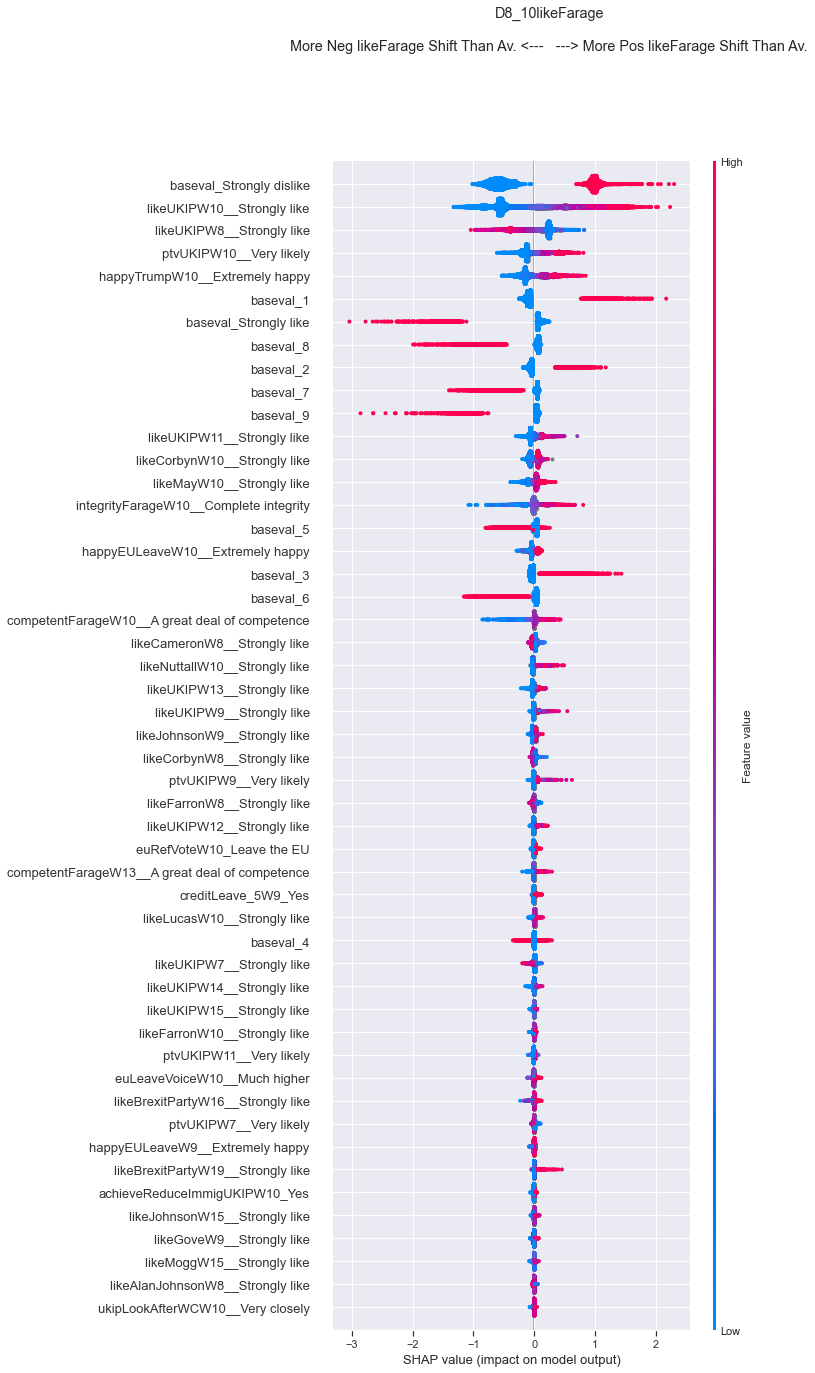

[10:03:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.22777
Will train until validation_0-rmse hasn't improved in 11.200000000000001 rounds.
[1]	validation_0-rmse:2.18785
[2]	validation_0-rmse:2.14666
[3]	validation_0-rmse:2.1072
[4]	validation_0-rmse:2.07373
[5]	validation_0-rmse:2.04328
[6]	validation_0-rmse:2.01692
[7]	validation_0-rmse:1.99032
[8]	validation_0-rmse:1.95971
[9]	validation_0-rmse:1.93535
[10]	validation_0-rmse:1.91008
[11]	validation_0-rmse:1.88935
[12]	validation_0-rmse:1.87436
[13]	validation_0-rmse:1.8535
[14]	validation_0-rmse:1.83485
[15]	validation_0-rmse:1.81485
[16]	validation_0-rmse:1.7982
[17]	validation_0-rmse:1.78234
[18]	validation_0-rmse:1.77211
[19]	validation_0-rmse:1.76063
[20]	validation_0-rmse:1.74662
[21]	validation_0-rmse:1.73585
[22]	validation_0-rmse:1.72247
[23]	validation_0-rmse:1.71029
[24]	validation_0-rmse:1.70225
[25]	validation_0-rmse:1.69678
[26]	valid

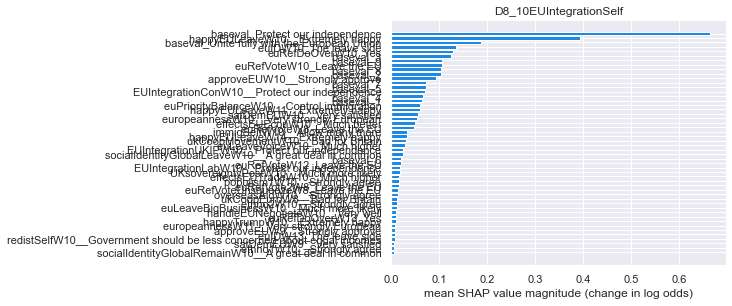

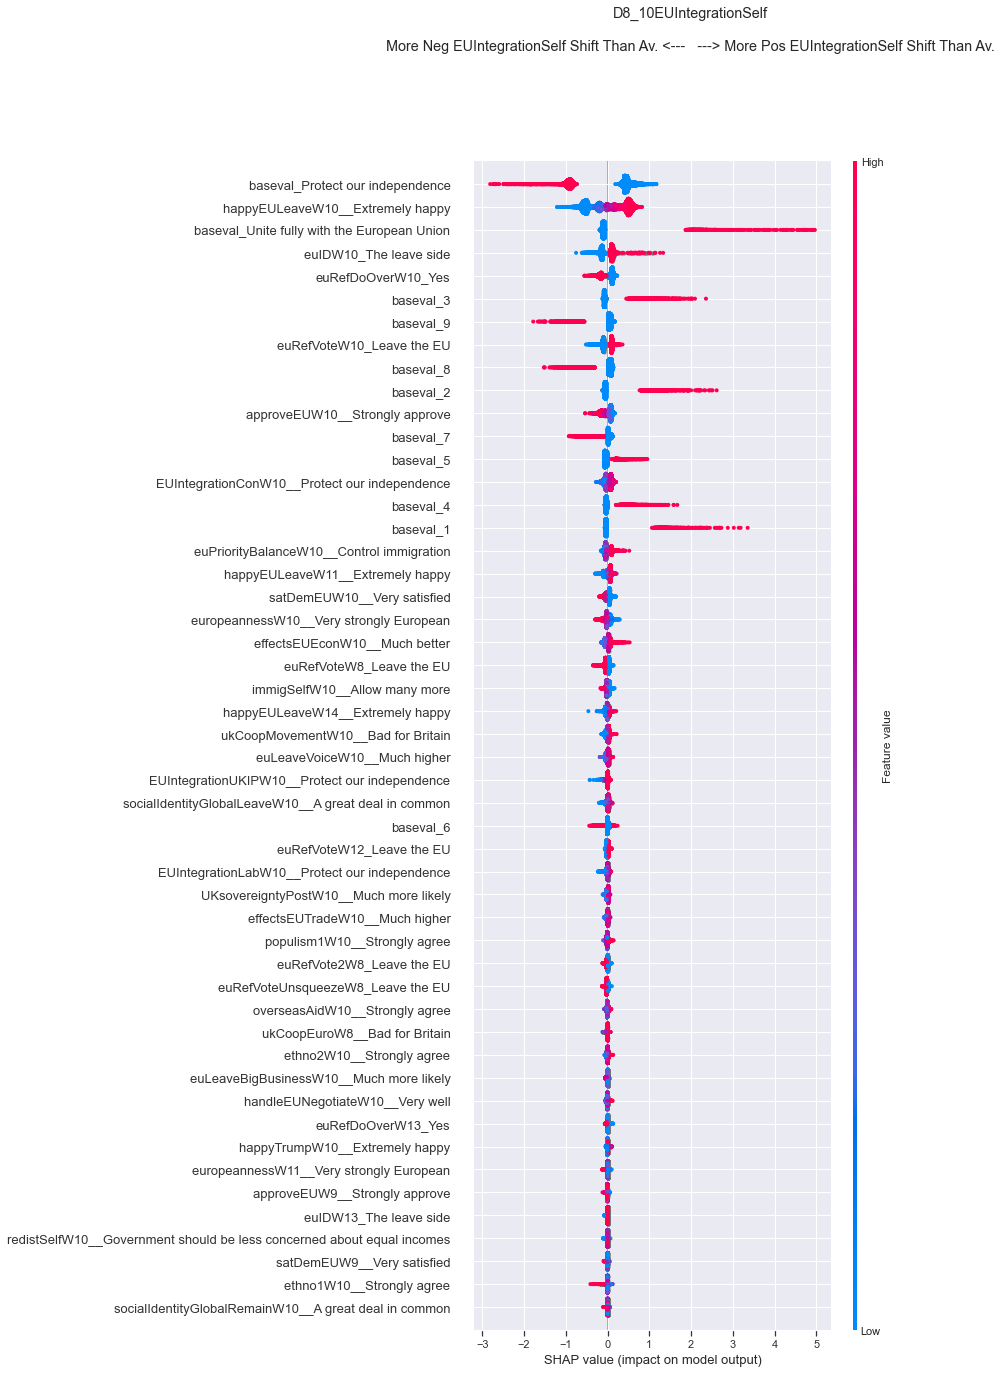

[10:25:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.32971
Will train until validation_0-rmse hasn't improved in 11.100000000000001 rounds.
[1]	validation_0-rmse:1.32078
[2]	validation_0-rmse:1.30846
[3]	validation_0-rmse:1.29796
[4]	validation_0-rmse:1.29231
[5]	validation_0-rmse:1.28178
[6]	validation_0-rmse:1.27311
[7]	validation_0-rmse:1.26705
[8]	validation_0-rmse:1.25791
[9]	validation_0-rmse:1.24999
[10]	validation_0-rmse:1.2424
[11]	validation_0-rmse:1.23568
[12]	validation_0-rmse:1.23132
[13]	validation_0-rmse:1.22553
[14]	validation_0-rmse:1.21998
[15]	validation_0-rmse:1.21579
[16]	validation_0-rmse:1.21082
[17]	validation_0-rmse:1.20521
[18]	validation_0-rmse:1.2008
[19]	validation_0-rmse:1.19792
[20]	validation_0-rmse:1.19372
[21]	validation_0-rmse:1.18964
[22]	validation_0-rmse:1.1861
[23]	validation_0-rmse:1.18294
[24]	validation_0-rmse:1.17976
[25]	validation_0-rmse:1.17707
[26]	valid

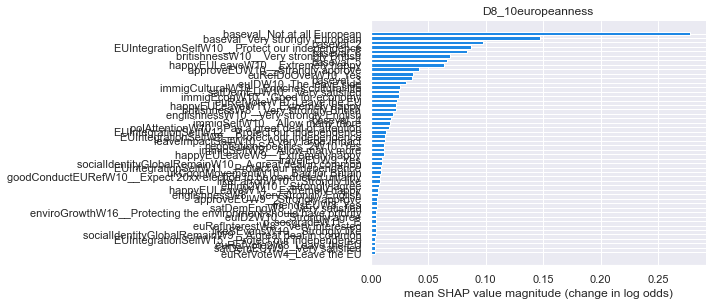

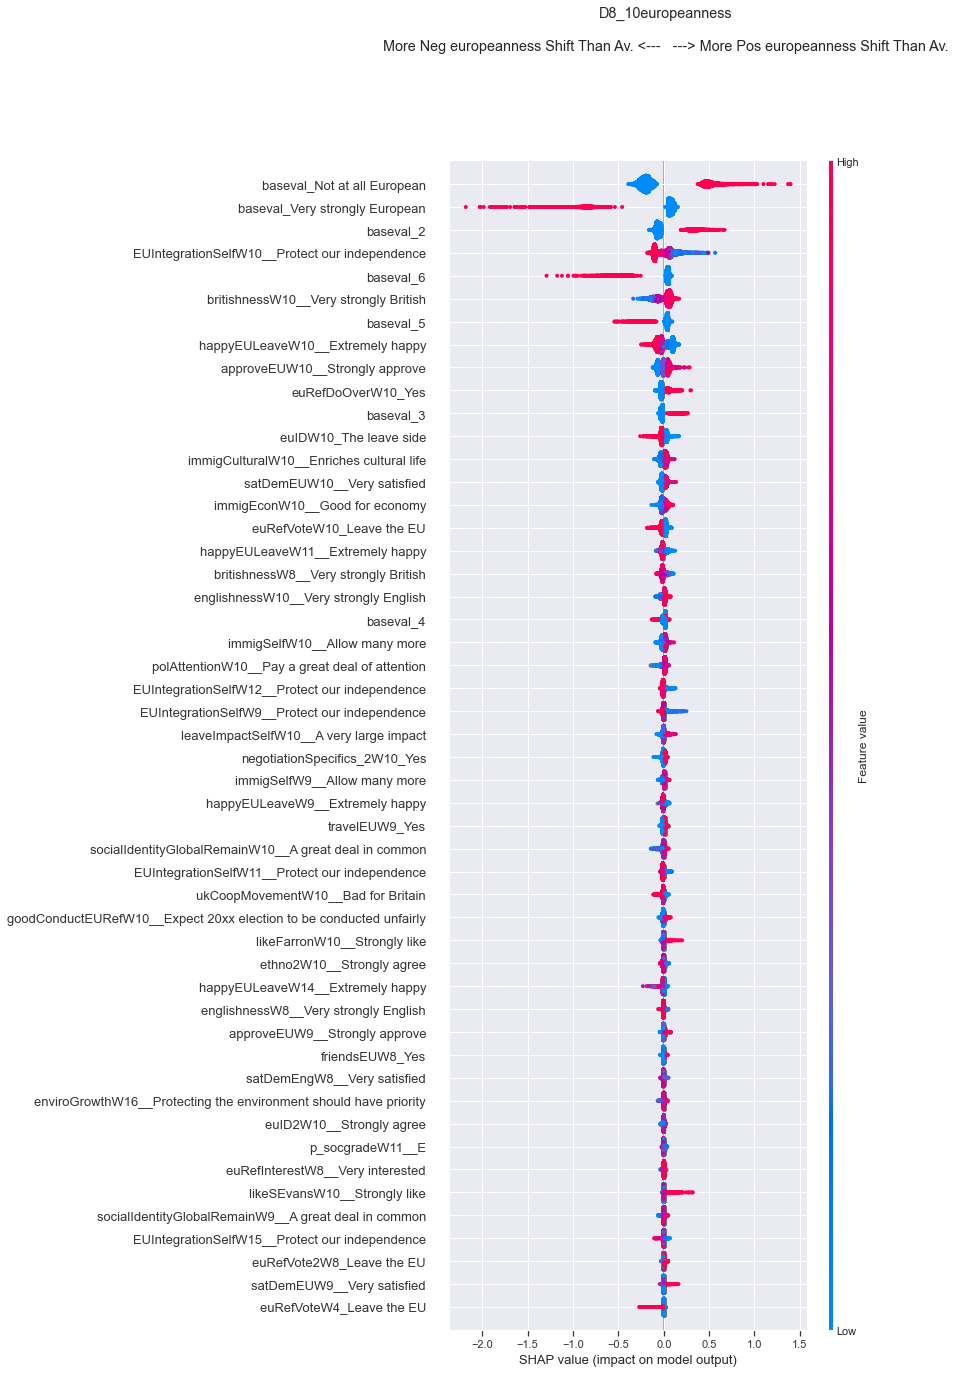

In [42]:
# %%time
## target = D7_8immigEcon


# "immigEcon", "immigCultural", "immigSelf", "immigrantsWelfareState", "ukCoopMovement",
#              "changeImmig", "controlImmig", 

for base in ["trustMPs", "likeFarage","EUIntegrationSelf","europeanness"]:

    
# base = "immigCultural"

    wno1 = "8"
    wno2 = "10"
    wave_seq = ["W"+wno1,"W"+wno2,"W9"]
    
    if base == "trustMPs":
        wno1 = "7"


    Treatment = "new_sequence_D"+wno1+"_"+wno2+base
    wave_vars = list(search(BES_reduced_with_na,"|".join( wave_seq ) ).index)

    # df = BES_reduced_with_na[waveless+].copy()
    df = BES_reduced_with_na.copy()


    var1 = match(BES_reduced_with_na,base+"W"+wno1).index[0]
    var2 = match(BES_reduced_with_na,base+"W"+wno2).index[0]

    temp = pd.get_dummies(BES_Panel[base+"W"+wno1],prefix="baseval").drop("baseval_Don't know",axis=1)

    # df["constant"] = 1.0
    df[temp.columns] = temp

    mask = BES_reduced_with_na[var1].notnull() & BES_reduced_with_na[var2].notnull()

    var_stub = "D"+wno1+"_"+wno2+base

    var_list = [var_stub]
    var_stub_list = [var_stub,base]
    
    if base in endog_imm_vars:
        var_stub_list.extend(endog_imm_vars)



    add_pairs(["W"+wno1,"W"+wno2])
    add_pairs(["W9","W10"])
    add_pairs(["W8","W9"])
    
    if base == "trustMPs":
        add_pairs(["W7","W8"])
        add_pairs(["W7","W9"])
        add_pairs(["W7","W10"])

    df[var_stub] = (BES_reduced_with_na[var2]) -\
                          (BES_reduced_with_na[var1])[mask]  


    (explainer, shap_values, train_columns, alg) = xgboost_run(subdir=Treatment,dataset=df,
                                                          var_list=var_list,var_stub_list=var_stub_list,use_mean_weights=True,
                                                          min_features = min(BES_reduced_with_na.shape[1]-1,50),
               title = var_stub+"\n\nMore Neg "+base+" Shift Than Av. <---   ---> More Pos "+base+" Shift Than Av.", Treatment=Treatment)

    treatment_dict[Treatment]  =shap_array(shap_values, train_columns, threshold = .1, min_features = 50)


In [44]:
pd.Series(treatment_dict)

new_sequence_D8_10immigEcon                 baseval_Bad for economy                       ...
new_sequence_D8_10immigCultural             baseval_Undermines cultural life              ...
new_sequence_D8_10immigSelf                 baseval_Allow many fewer                      ...
new_sequence_D8_10immigrantsWelfareState    baseval_Strongly agree                        ...
new_sequence_D8_10ukCoopMovement            baseval_Good for Britain                      ...
new_sequence_D8_10changeImmig               baseval_Getting a lot higher                  ...
new_sequence_D8_10controlImmig              baseval_No control at all                     ...
new_sequence_D7_10trustMPs                  baseval_No trust                              ...
new_sequence_D8_10likeFarage                baseval_Strongly dislike                      ...
new_sequence_D8_10EUIntegrationSelf         baseval_Protect our independence              ...
new_sequence_D8_10europeanness              baseval_Not at a

In [6]:
# immigEcon, immigCultural, immigSelf
# immigrantsWelfareState, ukCoopMovement, changeImmig, controlImmig
# trustMPs,likeFarage
# EUIntegrationSelf,europeanness

# immigCon/UKIP

# discrimWhite

Age_at_W1_rounded  Age_at_W1  Age_at_W2  Age_at_W3  Age_at_W4  \
id                                                                     
1                     58  57.850863  57.855603  58.335336  58.833221   
2                     62  61.847247  61.851987  62.331720  62.829605   
3                     76  75.812681  75.817421  76.297154  76.795039   
4                     51  50.984062  50.988802  51.468535  51.966419   
5                     68  67.984062  67.988802  68.468535  68.966419   
...                  ...        ...        ...        ...        ...   
98447                 23  23.378732  23.383472  23.863205  24.361089   
98448                 24  24.378732  24.383472  24.863205  25.361089   
98449                 30  30.331278  30.336018  30.815751  31.313636   
98450                 20  20.378732  20.383472  20.863205  21.361089   
98451                 38  38.378732  38.383472  38.863205  39.361089   

       Age_at_W5  Age_at_W6  Age_at_W7  Age_at_W8  Age_at_W9  ...  \
id                                                            ...   
1      58.909397  58.970528  59.900456  60.019697  60.106970  ...   
2      62.905781  62.966912  63.896840  64.016081  64.103355  ...   
3      76.871215  76.932346  77.862274  77.981515  78.068788  ...   
4      52.042595  52.103727  53.033655  53.152896  53.240169  ...   
5      69.042595  69.103727  70.033655  70.152896  70.240169  ...   
...          ...        ...        ...        ...        ...  ...   
98447  24.437265  24.498397  25.428324  25.547566  25.634839  ...   
98448  25.437265  25.498397  26.428324  26.547566  26.634839  ...   
98449  31.389812  31.450943  32.380871  32.500112  32.587385  ...   
98450  21.437265  21.498397  22.428324  22.547566  22.634839  ...   
98451  39.437265  39.498397  40.428324  40.547566  40.634839  ...   

       standardAgeGroup_at_W1  equalisedAgeGroup_at_W1  \
id                                                       
1                       56-65             (57.0, 65.0]   
2                       56-65             (57.0, 65.0]   
3                         66+            (65.0, 100.0]   
4                       46-55             (49.0, 57.0]   
5                         66+            (65.0, 100.0]   
...                       ...                      ...   
98447                   18-25             (22.0, 31.0]   
98448                   18-25             (22.0, 31.0]   
98449                   26-35             (22.0, 31.0]   
98450                   18-25             (11.0, 22.0]   
98451                   36-45             (31.0, 40.0]   

       equalisedAgeGroup_at_W1_detailed  equalLengthAgeGroup_at_W1  \
id                                                                   
1                          (57.0, 61.0]                   (55, 60]   
2                          (61.0, 65.0]                   (60, 65]   
3                         (69.0, 100.0]                   (75, 80]   
4                          (49.0, 54.0]                   (50, 55]   
5                          (65.0, 69.0]                   (65, 70]   
...                                 ...                        ...   
98447                      (22.0, 27.0]                   (20, 25]   
98448                      (22.0, 27.0]                   (20, 25]   
98449                      (27.0, 31.0]                   (25, 30]   
98450                      (18.0, 22.0]                   (15, 20]   
98451                      (35.0, 40.0]                   (35, 40]   

       standardAgeGroup_at_W19  equalisedAgeGroup_at_W19  \
id                                                         
1                        56-65              (63.0, 71.0]   
2                          66+              (63.0, 71.0]   
3                          66+             (71.0, 106.0]   
4                        56-65              (55.0, 63.0]   
5                          66+             (71.0, 106.0]   
...                        ...                       ...   
98447                    2

In [37]:
search(BES_reduced_with_na,"trustMPs")

trustMPsW1__A great deal of trust     29864
trustMPsW2__A great deal of trust     29532
trustMPsW3__A great deal of trust     27071
trustMPsW4__A great deal of trust     30737
trustMPsW6__A great deal of trust     29666
trustMPsW7__A great deal of trust     30175
trustMPsW9__A great deal of trust     29286
trustMPsW10__A great deal of trust    29289
trustMPsW12__A great deal of trust     8243
trustMPsW15__A great deal of trust     7465
trustMPsW16__A great deal of trust     8930
trustMPsW17__A great deal of trust    33158
trustMPsW18__A great deal of trust    36418
trustMPsW19__A great deal of trust    30888
dtype: int64

In [6]:
wno1="8"
wno2="10"

In [7]:
search(BES_reduced_with_na,"|".join( ["W"+wno1,"W"+wno2,"W9"] ) )

turnoutUKGeneralW8__Very likely that I will vote     32748
turnoutUKGeneralW9__Very likely that I will vote     29204
turnoutUKGeneralW10__Very likely that I will vote    29276
generalElectionCertaintyW9__Completely certain       22397
generalElectionCertaintyW10__Completely certain      22954
                                                     ...  
privScndSchlW1_W4W7W9_W12W14W15_Yes                  74426
neverPrivSchlW1_W4W7W9_W12W14W15_Yes                 74426
p_parentW10_Yes                                      27627
p_parentW9_Yes                                       28764
p_parentW8_Yes                                       28753
Length: 1443, dtype: int64

In [3]:
# def add_pairs(wave_pair):
#     pair1_cols = [x for x in search(df,wave_pair[0]).index if x.replace(wave_pair[0],wave_pair[1]) in df.columns]
#     pair2_cols = [x.replace(wave_pair[0],wave_pair[1]) for x in pair1_cols]

#     prefix = "D"+"_".join([x.replace("W","") for x in wave_pair])
#     delta_df = pd.DataFrame(df[pair2_cols].values - df[pair1_cols].values,
#                             columns = [prefix+x.replace(wave_pair[0],"") for x in pair1_cols])
#     if pair1_cols!=[]:
#         biggest_dtype = df[pair1_cols].dtypes.value_counts().index[-1].name
#         biggest_dtype = "Int64" # nino_df screws this up by introducing floats!
#         delta_df = delta_df.astype(biggest_dtype).astype('float32')
#         df[delta_df.columns] = delta_df
        


[0]	validation_0-rmse:1.87899
Will train until validation_0-rmse hasn't improved in 40.400000000000006 rounds.
[1]	validation_0-rmse:1.86093
[2]	validation_0-rmse:1.8422
[3]	validation_0-rmse:1.83145
[4]	validation_0-rmse:1.81896
[5]	validation_0-rmse:1.80289
[6]	validation_0-rmse:1.7911
[7]	validation_0-rmse:1.78
[8]	validation_0-rmse:1.77201
[9]	validation_0-rmse:1.76245
[10]	validation_0-rmse:1.74793
[11]	validation_0-rmse:1.73379
[12]	validation_0-rmse:1.72193
[13]	validation_0-rmse:1.71332
[14]	validation_0-rmse:1.70192
[15]	validation_0-rmse:1.69157
[16]	validation_0-rmse:1.67931
[17]	validation_0-rmse:1.6729
[18]	validation_0-rmse:1.66596
[19]	validation_0-rmse:1.65715
[20]	validation_0-rmse:1.65301
[21]	validation_0-rmse:1.64924
[22]	validation_0-rmse:1.63846
[23]	validation_0-rmse:1.63035
[24]	validation_0-rmse:1.622
[25]	validation_0-rmse:1.61399
[26]	validation_0-rmse:1.60718
[27]	validation_0-rmse:1.60088
[28]	validation_0-rmse:1.59726
[29]	validation_0-rmse:1.59036
[30]	va

[258]	validation_0-rmse:1.38435
[259]	validation_0-rmse:1.38414
[260]	validation_0-rmse:1.384
[261]	validation_0-rmse:1.38393
[262]	validation_0-rmse:1.38397
[263]	validation_0-rmse:1.38397
[264]	validation_0-rmse:1.38379
[265]	validation_0-rmse:1.38373
[266]	validation_0-rmse:1.38376
[267]	validation_0-rmse:1.38362
[268]	validation_0-rmse:1.38357
[269]	validation_0-rmse:1.38369
[270]	validation_0-rmse:1.38364
[271]	validation_0-rmse:1.38338
[272]	validation_0-rmse:1.3835
[273]	validation_0-rmse:1.38344
[274]	validation_0-rmse:1.38342
[275]	validation_0-rmse:1.38338
[276]	validation_0-rmse:1.38335
[277]	validation_0-rmse:1.38344
[278]	validation_0-rmse:1.38343
[279]	validation_0-rmse:1.38342
[280]	validation_0-rmse:1.38321
[281]	validation_0-rmse:1.38328
[282]	validation_0-rmse:1.38313
[283]	validation_0-rmse:1.38296
[284]	validation_0-rmse:1.38301
[285]	validation_0-rmse:1.38311
[286]	validation_0-rmse:1.38305
[287]	validation_0-rmse:1.3824
[288]	validation_0-rmse:1.3823
[289]	validat

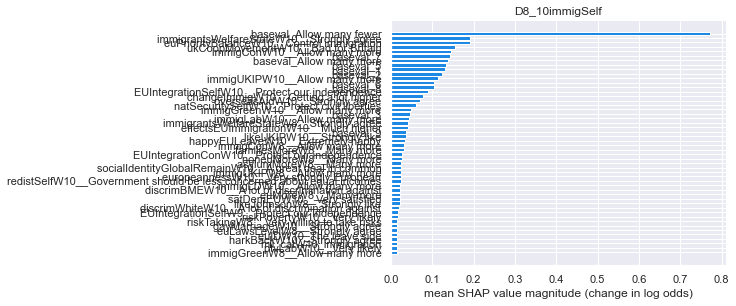

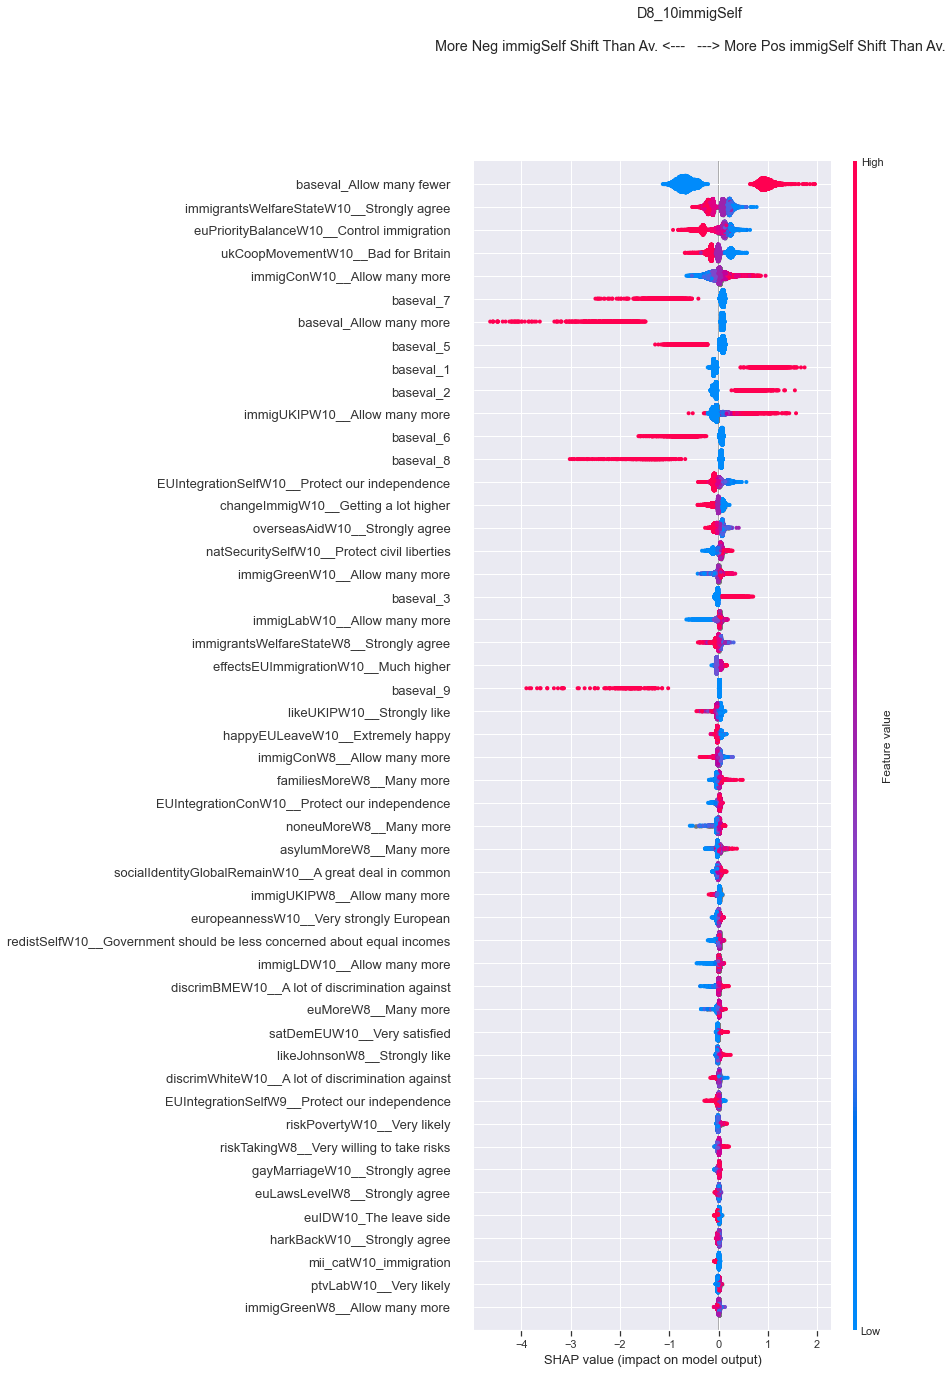

Wall time: 14min 1s


In [28]:
%%time
## target = D7_8immigEcon

for base in ["immigSelf"]:

    
# base = "immigCultural"

    wno1 = "8"
    wno2 = "10"



    Treatment = "fast_version_sequence_D"+wno1+"_"+wno2+base
    wave_vars = list(search(BES_reduced_with_na,"|".join( ["W"+wno1,"W"+wno2,"W9"] ) ).index)

    # df = BES_reduced_with_na[waveless+].copy()
#     df = BES_reduced_with_na.copy()


    var1 = match(BES_reduced_with_na,base+"W"+wno1).index[0]
    var2 = match(BES_reduced_with_na,base+"W"+wno2).index[0]

    df = pd.get_dummies(BES_Panel[base+"W"+wno1],prefix="baseval").drop("baseval_Don't know",axis=1)

    # df["constant"] = 1.0
#     df[temp.columns] = temp

    mask = BES_reduced_with_na[var1].notnull() & BES_reduced_with_na[var2].notnull() & BES_Panel["wt_new_W10"].notnull()

    var_stub = "D"+wno1+"_"+wno2+base

    var_list = [var_stub]
    var_stub_list = [var_stub,base]
    
    if base in endog_imm_vars:
        var_stub_list.extend(endog_imm_vars)


    # add delta columns to df
    add_pairs(["W"+wno1,"W"+wno2])
    add_pairs(["W9","W10"])
    add_pairs(["W8","W9"])

    df[var_stub] = (BES_reduced_with_na[var2]) -\
                          (BES_reduced_with_na[var1])  
    
    BES_reduced_with_na[df.columns] = df
    df_cols = list(df.columns)

    (explainer, shap_values, train_columns, train_index, alg) = xgboost_run(subdir=Treatment,
                                                          dataset=BES_reduced_with_na[mask][df_cols+wave_vars],
                                                          use_specific_weights=BES_Panel["wt_new_W10"][mask],     
                                                          var_list=var_list,var_stub_list=var_stub_list,
                                                          min_features = min(BES_reduced_with_na.shape[1]-1,50),
               title = var_stub+"\n\nMore Neg "+base+" Shift Than Av. <---   ---> More Pos "+base+" Shift Than Av.", Treatment=Treatment)
    
    treatment_dict[Treatment] = shap_array(shap_values, train_columns, threshold = .1, min_features = 50)
    # cleanup
    BES_reduced_with_na.drop(df.columns,axis=1,inplace=True)
    


In [5]:
def add_pairs(wave_pair,df,BES_reduced_with_na):
    pair1_cols = [x for x in search(BES_reduced_with_na,wave_pair[0]).index if x.replace(wave_pair[0],wave_pair[1]) in BES_reduced_with_na.columns]
    pair2_cols = [x.replace(wave_pair[0],wave_pair[1]) for x in pair1_cols]

    prefix = "D"+"_".join([x.replace("W","") for x in wave_pair])
    delta_df = pd.DataFrame(BES_reduced_with_na[pair2_cols].values - BES_reduced_with_na[pair1_cols].values,
                            columns = [prefix+x.replace(wave_pair[0],"") for x in pair1_cols],
                            index = BES_reduced_with_na.index)
    if pair1_cols!=[]:
#         biggest_dtype = df[pair1_cols].dtypes.value_counts().index[-1].name
#         biggest_dtype = "Int64" # nino_df screws this up by introducing floats!
#         delta_df = delta_df#.astype(biggest_dtype).astype('float32')
        df[delta_df.columns] = delta_df
    return df

treatment_dict = {}
BES_reduced_with_na[["Economic Left-Right","Social Liberal-Authoritarian"]] = pan_dataset_allr_values[['Economic: Left <-> Right{gaussian-ish}complete_fully','Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']]
BES_reduced_with_na["Age"] = pan_dataset_ages["Age_at_W10"]
waveless = list(search(BES_reduced_with_na,"^((?!W\d+).)*$").index)
endog_imm_vars = ["immigCultural","immigEcon","immigSelf"]
BES_reduced_with_na["immigSelfW13__Allow many more"] = BES_Panel["immigSelfW13"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
BES_reduced_with_na["blackEqualityW15__Gone much too far"] = BES_Panel["blackEqualityW15"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [ ]:
# ukCoopMovement
# immigrantsWelfareState
# euPriorityBalance
# trustMPs



changeImmig
controlImmig
immigrationLevel
immigContributeTake
dealPriorityImmig
EUIntegrationSelf

In [3]:
gc.collect()
# base
# effectsEUImmigration: controlImmig,effectsEUTerror(+delta),effectsEUUnemployment(-),changeImmig(--)


# D15_16effectsEUImmigration -> effectsEUTerrorW16 v big -> Russia, Salisbury??
# greater/lesser risk of terrorism correlating with greater/lesser levels of immigration???
# also 14_15

# effectsEUUnemployment smaller effect

## polForTheRich ... *anti-correlates* with EconomicLeftRight

40

9 10
deltas added
xgboost run started
[0]	validation_0-rmse:1.74058
Will train until validation_0-rmse hasn't improved in 50.0 rounds.
[1]	validation_0-rmse:1.72055
[2]	validation_0-rmse:1.70812
[3]	validation_0-rmse:1.69079
[4]	validation_0-rmse:1.67536
[5]	validation_0-rmse:1.6589
[6]	validation_0-rmse:1.64541
[7]	validation_0-rmse:1.63364
[8]	validation_0-rmse:1.62196
[9]	validation_0-rmse:1.61178
[10]	validation_0-rmse:1.60066
[11]	validation_0-rmse:1.58906
[12]	validation_0-rmse:1.57816
[13]	validation_0-rmse:1.56819
[14]	validation_0-rmse:1.55879
[15]	validation_0-rmse:1.55062
[16]	validation_0-rmse:1.54361
[17]	validation_0-rmse:1.53579
[18]	validation_0-rmse:1.53223
[19]	validation_0-rmse:1.52536
[20]	validation_0-rmse:1.51828
[21]	validation_0-rmse:1.51069
[22]	validation_0-rmse:1.50462
[23]	validation_0-rmse:1.49922
[24]	validation_0-rmse:1.49381
[25]	validation_0-rmse:1.49047
[26]	validation_0-rmse:1.48533
[27]	validation_0-rmse:1.48068
[28]	validation_0-rmse:1.47551
[29]	va

[257]	validation_0-rmse:1.30936
[258]	validation_0-rmse:1.30937
[259]	validation_0-rmse:1.30937
[260]	validation_0-rmse:1.30924
[261]	validation_0-rmse:1.30909
[262]	validation_0-rmse:1.30897
[263]	validation_0-rmse:1.30894
[264]	validation_0-rmse:1.30876
[265]	validation_0-rmse:1.30876
[266]	validation_0-rmse:1.30872
[267]	validation_0-rmse:1.30871
[268]	validation_0-rmse:1.30848
[269]	validation_0-rmse:1.30841
[270]	validation_0-rmse:1.30832
[271]	validation_0-rmse:1.30824
[272]	validation_0-rmse:1.30822
[273]	validation_0-rmse:1.30809
[274]	validation_0-rmse:1.30806
[275]	validation_0-rmse:1.30796
[276]	validation_0-rmse:1.30801
[277]	validation_0-rmse:1.3078
[278]	validation_0-rmse:1.30794
[279]	validation_0-rmse:1.30809
[280]	validation_0-rmse:1.30802
[281]	validation_0-rmse:1.30771
[282]	validation_0-rmse:1.30754
[283]	validation_0-rmse:1.3076
[284]	validation_0-rmse:1.30764
[285]	validation_0-rmse:1.30783
[286]	validation_0-rmse:1.30792
[287]	validation_0-rmse:1.30783
[288]	vali

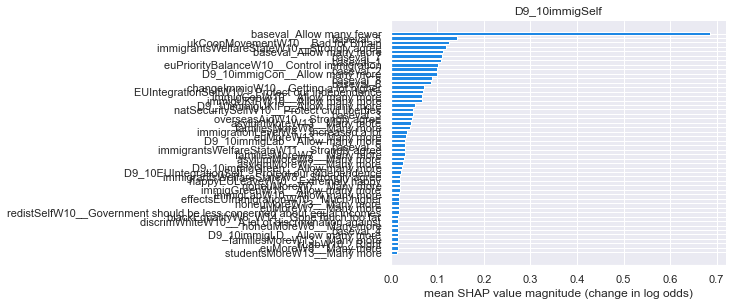

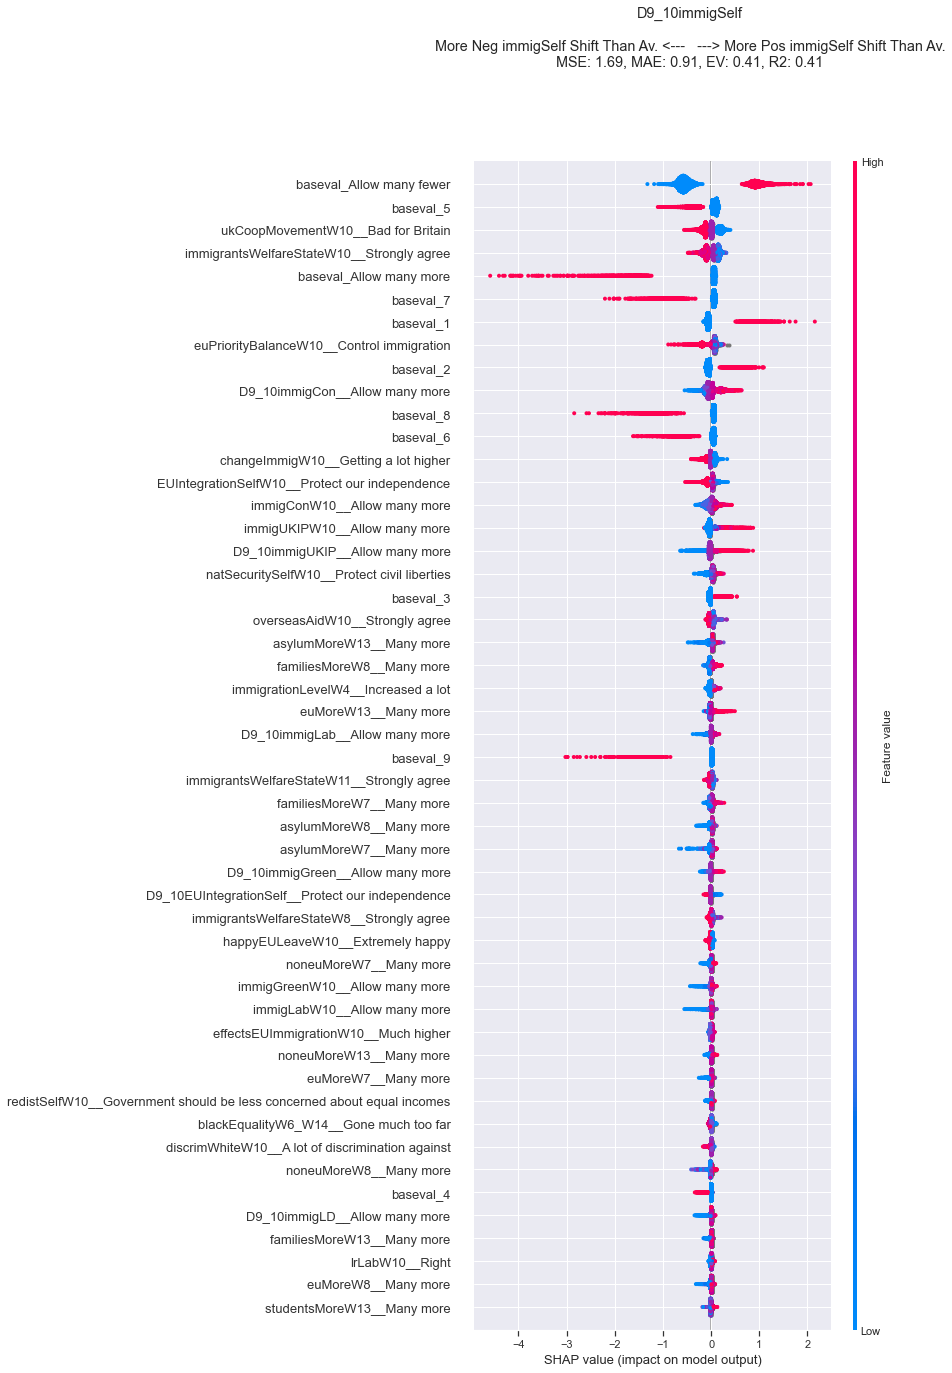

<Figure size 1152x720 with 0 Axes>

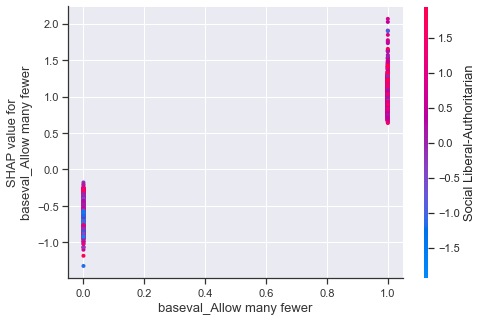

<Figure size 1152x720 with 0 Axes>

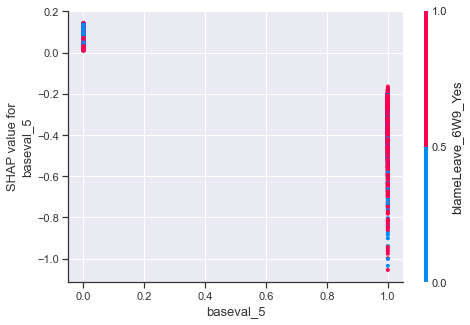

<Figure size 1152x720 with 0 Axes>

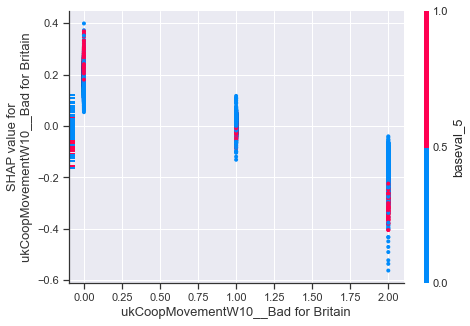

<Figure size 1152x720 with 0 Axes>

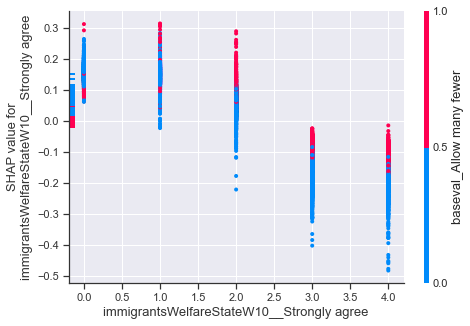

<Figure size 1152x720 with 0 Axes>

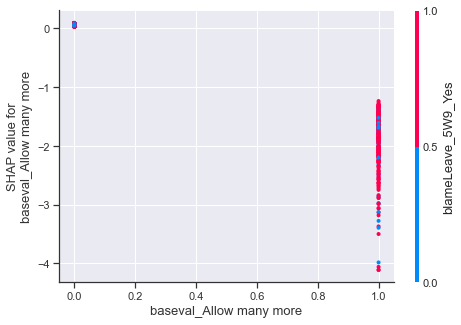

<Figure size 1152x720 with 0 Axes>

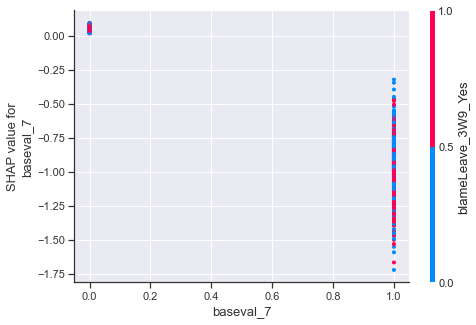

<Figure size 1152x720 with 0 Axes>

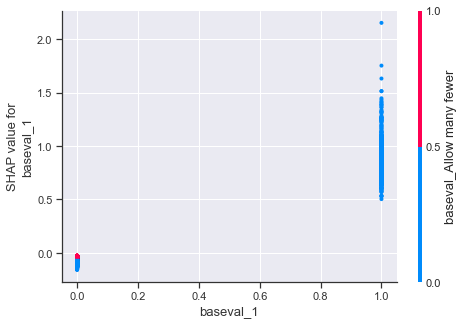

<Figure size 1152x720 with 0 Axes>

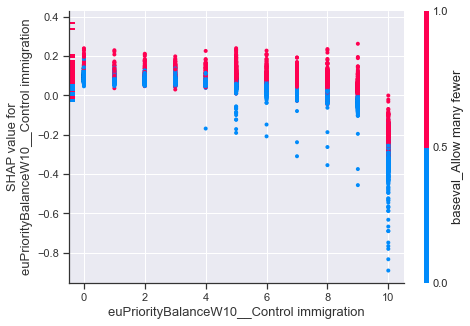

<Figure size 1152x720 with 0 Axes>

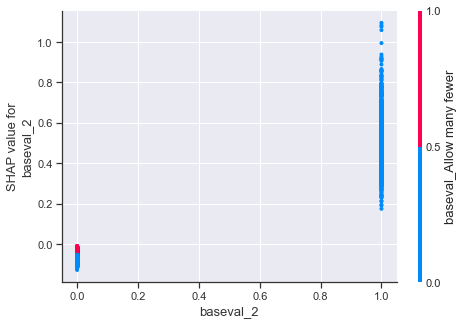

<Figure size 1152x720 with 0 Axes>

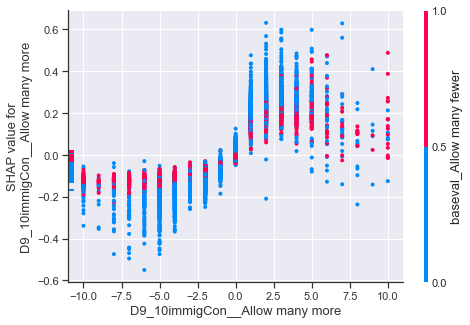


KeyboardInterrupt



<Figure size 1152x720 with 0 Axes>

In [6]:
# %%time
## target = D7_8immigEcon
treatment_base ="base&deltas"

# wave_list = ['8', '10']
wave_to_wt = dict(zip([str(x) for x in range(1,20)],
         ['wt_full_W1', 'wt_full_W2', 'wt_full_W3', 'wt_full_W4', 'wt_full_W5', 'wt_new_W6', 'wt_new_W7', 'wt_new_W8', 'wt_new_W9', 'wt_new_W10', 'wt_new_W11', 'wt_new_W12', 'wt_new_W13_result', 'wt_new_W14', 'wt_new_W15', 'wt_new_W16', 'wt_new_W17', 'wt_new_W18', 'wt_new_W19_result', ],
 ))


# immigSelf W14-W15 weird crash
# add: childBenefitsRepatriate
for base in ["immigSelf"]:

    wave_list = [x.replace(base+"W","").split("_")[0] for x in match(BES_reduced_with_na,base).index]
    wave_list = ['9','10']
# base = "immigCultural"
    for wave_pos in range(len(wave_list)-1):
        
        try:
            wno1 = wave_list[wave_pos]
            wno2 = wave_list[wave_pos+1]
            
            print(wno1,wno2)



            Treatment = treatment_base+"_D"+wno1+"_"+wno2+base
        #     wave_vars = list(search(BES_reduced_with_na,"|".join( ["W"+wno1,"W"+wno2,"W9"] ) ).index)

            # df = BES_reduced_with_na[waveless+].copy()
        #     df = BES_reduced_with_na.copy()


            var1 = match(BES_reduced_with_na,base+"W"+wno1).index[0]
            var2 = match(BES_reduced_with_na,base+"W"+wno2).index[0]

            df = pd.get_dummies(BES_Panel[base+"W"+wno1],prefix="baseval").drop("baseval_Don't know",axis=1)
    #         df = pd.DataFrame()
            # df["constant"] = 1.0
        #     df[temp.columns] = temp
            wt_var = wave_to_wt[wave_list[wave_pos+1]]
            mask = BES_reduced_with_na[var1].notnull() & BES_reduced_with_na[var2].notnull() & BES_Panel[wt_var].notnull()

            var_stub = "D"+wno1+"_"+wno2+base

            var_list = [var_stub]
            var_stub_list = [var_stub,base]

            if base in endog_imm_vars:
                var_stub_list.extend(endog_imm_vars)


            # add delta columns to df
            # all combinations
            for first in range(int(wno1),int(wno2)):
                for second in range(first+1,int(wno2)+1):
                    df = add_pairs(["W"+str(first),"W"+str(second)],df,BES_reduced_with_na)
            print("deltas added")

            df[var_stub] = (BES_reduced_with_na[var2]) -\
                                  (BES_reduced_with_na[var1])  


            all_bes_cols = list(BES_reduced_with_na.columns)
            BES_reduced_with_na[df.columns] = df
            df_cols = list(df.columns)
    #[df_cols+all_bes_cols]
            print("xgboost run started")
            (explainer, shap_values, train_columns, train_index,
                                        alg, output_subfolder)  = xgboost_run(subdir=Treatment,
                                                                  dependence_plots=True,
    #                                                               dataset=df[mask],
                                                                  dataset=BES_reduced_with_na[mask],
                                                                  use_specific_weights=BES_Panel[wt_var][mask],     
                                                                  var_list=var_list,var_stub_list=var_stub_list,
                                                                  min_features = min(BES_reduced_with_na.shape[1]-1,50),
                                                                  title = var_stub+"\n\nMore Neg "+base+" Shift Than Av. <---   ---> More Pos "+base+" Shift Than Av.", Treatment=Treatment)
            # None means it skipped because low sample size
            if explainer is not None:
                
                shap_series = shap_array(shap_values, train_columns, threshold = .1, min_features = 50)
                shap_series.to_pickle(output_subfolder+ "shap_series.zip", compression='zip')
                treatment_dict[Treatment] = shap_series
            # cleanup
            BES_reduced_with_na.drop(df.columns,axis=1,inplace=True,errors='ignore')
        except Exception as e:
            print(e)
            raise(e)
            continue


> c:\programdata\anaconda3\envs\bes_analysis\lib\site-packages\numpy\lib\function_base.py(426)average()
    424     if returned:
    425         if scl.shape != avg.shape:
--> 426             scl = np.broadcast_to(scl, avg.shape).copy()
    427         return avg, scl
    428     else:

ipdb> up
> <__array_function__ internals>(6)average()

ipdb> up
> c:\programdata\anaconda3\envs\bes_analysis\lib\site-packages\numpy\lib\function_base.py(2431)cov()
   2429             w *= aweights
   2430 
-> 2431     avg, w_sum = average(X, axis=1, weights=w, returned=True)
   2432     w_sum = w_sum[0]
   2433 

ipdb> up
> <__array_function__ internals>(6)cov()

ipdb> up
> c:\programdata\anaconda3\envs\bes_analysis\lib\site-packages\numpy\lib\function_base.py(2526)corrcoef()
   2524         warnings.warn('bias and ddof have no effect and are deprecated',
   2525                       DeprecationWarning, stacklevel=3)
-> 2526     c = cov(x, y, rowvar)
   2527     try:
   2528         d = diag(c)

ipdb

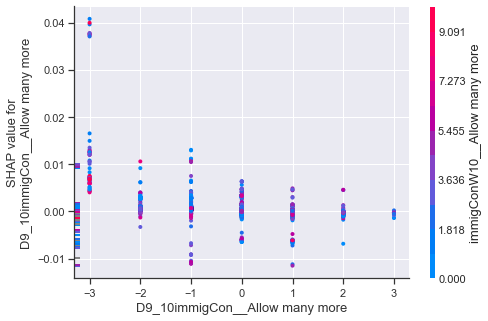

ipdb> shap.dependence_plot("D9_10immigCon__Allow many more", shap_values, train,    train.drop([x for x in train.columns if ("baseval" in x) or ("immigConW10" in x)], axis=1).columns)


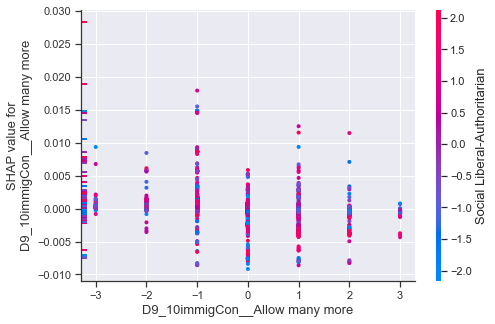

In [ ]:
%debug

In [ ]:
shap.dependence_plot("D9_10immigCon__Allow many more", shap_values, train,
   train.drop([x for x in train.columns if ("baseval" in x) or ("immigConW10" in x)], axis=1).columns)

In [26]:
# not so sure about how this has run

BES_reduced_with_na["blackEqualityW1__Gone much too far"] = BES_reduced_with_na["blackEqualityW1_W5__Gone much too far"]
BES_reduced_with_na["blackEqualityW6__Gone much too far"] = BES_reduced_with_na["blackEqualityW6_W14__Gone much too far"]
BES_Panel["blackEqualityW1"] = BES_Panel["blackEqualityW1_W5"]
BES_Panel["blackEqualityW6"] = BES_Panel["blackEqualityW6_W14"]

In [21]:
search(BES_reduced_with_na,"blackEquality")

blackEqualityW16__Gone much too far       33602
blackEqualityW17__Gone much too far       30877
blackEqualityW1_W5__Gone much too far     38817
blackEqualityW6_W14__Gone much too far    57461
blackEqualityW15__Gone much too far        4410
dtype: int64

In [22]:
search(BES_Panel,"blackEquality")

blackEqualityW15        5109
blackEqualityW16       37959
blackEqualityW17       34366
blackEqualityW1_W5     41876
blackEqualityW6_W14    63222
dtype: int64

In [9]:
list(range(len(wave_list)-1))

[0, 1]

In [61]:
column_description["immigManipCheckW7"]

'Not at all worried | Very worried'

In [63]:
BES_Panel["immigManipCheckW2"].value_counts()

1.0      4284
7.0      2931
4.0      1958
2.0      1766
5.0      1711
997.0    1699
6.0      1541
3.0      1257
Name: immigManipCheckW2, dtype: int64

In [64]:
BES_Panel["immigManipCheck2W2"].value_counts()

7.0      3893
5.0      2624
6.0      2460
4.0      2299
3.0      1709
2.0      1546
1.0      1332
997.0    1284
Name: immigManipCheck2W2, dtype: int64

In [9]:
pickle.dump( treatment_dict, open( BES_output_folder+"treatment_dict3.pkl", "wb" ) )

In [19]:
(shap_values!=0.0).sum()

325470

In [21]:
shap_values.shape,10849*9824

((10849, 9824), 106580576)

In [22]:
325470/106580576

0.0030537459283387623

In [25]:
pd.DataFrame(shap_values).memory_usage().sum()

426322432

In [28]:
pd.DataFrame(shap_values).astype(pd.SparseDtype("float32", 0.0)).memory_usage().sum()

2603888

In [35]:
global_shap_vals = np.abs(shap_values).mean(0)

In [44]:
pd.Series(global_shap_vals[inds][::-1],index = shap_values.columns[inds][::-1])

baseval_Allow many fewer                                                  0.263690
EUIntegrationConW11__Protect our independence                             0.119242
baseval_2                                                                 0.096069
D10_11immigSelf__Allow many more                                          0.095670
baseval_3                                                                 0.076452
baseval_Allow many more                                                   0.076415
baseval_1                                                                 0.071186
immigUKIPW11__Allow many more                                             0.050948
baseval_7                                                                 0.050558
baseval_8                                                                 0.041516
baseval_5                                                                 0.040692
D10_11immigUKIP__Allow many more                                          0.039038
base

In [38]:
%%time
min_features=50
threshold=.1
global_shap_vals = np.abs(shap_values).mean(0)#[::-1]
n_top_features = max( sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold),
                      min_features )

inds = np.argsort(global_shap_vals)[-n_top_features:]

pd.Series(global_shap_vals[inds][::-1],index = train_columns[inds][::-1])

Wall time: 9.21 s


Age                                                    NaN
overseasAidW11__Strongly agree                         NaN
baseval_Allow many fewer                          0.263690
D15_16immigSelf__Allow many more                       NaN
baseval_1                                         0.071186
baseval_8                                         0.041516
immigSelfW13__Allow many more                          NaN
immigConW11__Allow many more                           NaN
baseval_5                                         0.040692
baseval_6                                         0.037503
baseval_3                                         0.076452
D15_16immigUKIP__Allow many more                       NaN
baseval_4                                         0.009519
D15_16immigLab__Allow many more                        NaN
grammarW11__Strongly support                           NaN
immigSelfW11__Allow many more                     0.010017
econGenRetroW13__Got a lot better                      N

In [47]:
# import os
# rootdir = 'C://Users//Marios//Documents//GitHub//BES_analysis//Output'

# for subdir, dirs, files in os.walk(rootdir):
#     for file in files:
#         if file=="shap_values.zip":
#             print( os.path.join(subdir, file) )
#             shap_values = pd.read_pickle(os.path.join(subdir, file), compression='zip')
#             shap_values.astype(pd.SparseDtype("float32", 0.0)).to_pickle(os.path.join(subdir, file), compression='zip')

In [9]:
# 14 mins each
# df.shape#[search(df,"immigCultural").index]

# D8_10immigEcon:
# D8_10immigSelf(covaries), D7_8immigCult(pos shift pred neg), D7_10ukCoopMovement__Bad for Britain (neg shift pred pos)
gc.collect()

81

In [8]:
# BES_reduced_with_na.drop(df.columns,axis=1,inplace=True, errors='ignore')

In [86]:
pd.DataFrame(shap_values,columns=train_columns)[[x for x in train_columns if x[0]=="D"]].mean().sort_values().head(50)

D8_9EUIntegrationLD__Protect our independence              -0.000219
D8_10likeLD__Strongly like                                 -0.000188
D8_9grnUnited__Very united                                 -0.000098
D8_10effectsEUEcon__Much better                            -0.000076
D8_9immigCon__Allow many more                              -0.000065
D8_9likeGove__Strongly like                                -0.000064
D8_10grnUnited__Very united                                -0.000061
D8_10econGenRetro__Got a lot better                        -0.000059
D8_9britishness__Very strongly British                     -0.000057
D9_10immigGreen__Allow many more                           -0.000056
D8_9EUIntegrationGreen__Protect our independence           -0.000053
D8_10socialIdentityGlobalLeave__A great deal in common     -0.000053
D8_10effectsEUTrade__Much higher                           -0.000049
D8_9socialIdentityGlobalLeave__A great deal in common      -0.000049
D9_10englishness__Very strongly En

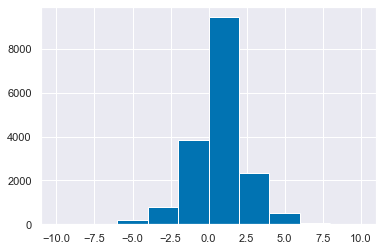

In [78]:
df["D9_10likeLD__Strongly like"].hist()

In [55]:
# 250 columns for on pair of D_

# relative to 19 x 

(97006, 9523)

In [31]:
# wave_to_wt["19"]


# search(BES_Panel,"immigSelf")

'wt_new_W19_result'

In [7]:
(explainer, shap_values, train_columns, alg)

(<shap.explainers.tree.TreeExplainer at 0x6137f308>,
 array([[ 5.9864521e-01, -1.8611126e-02, -1.4524353e-02, ...,
         -2.8022600e-04,  1.2883414e-03, -1.2880418e-04],
        [-3.6325711e-01,  4.3429896e-01, -2.5350081e-02, ...,
         -2.7276215e-04,  5.3196040e-04, -3.2665941e-04],
        [-6.9878429e-01, -2.8319335e-02, -3.5657480e-02, ...,
         -2.5399384e-04,  1.8400396e-03,  1.2846259e-04],
        ...,
        [-6.5486896e-01, -3.1493478e-02, -5.0862581e-02, ...,
          2.2338945e-04, -1.5178325e-03,  1.6709560e-05],
        [ 5.3763169e-01, -1.9893527e-02, -1.4340961e-02, ...,
          3.2503178e-04, -3.3175020e-04,  2.5621685e-04],
        [ 1.0301094e+00, -2.2178270e-02, -1.5700072e-02, ...,
         -5.2119966e-04, -1.4758660e-03,  1.1926155e-03]], dtype=float32),
 Index(['baseval_Allow many fewer', 'baseval_1', 'baseval_2', 'baseval_3',
        'baseval_4', 'baseval_5', 'baseval_6', 'baseval_7', 'baseval_8',
        'baseval_9',
        ...
        'postala

In [ ]:
(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=6, missing=None, n_estimators=368,
              n_jobs=1, njobs=3, nthread=None, objective='reg:linear',
              random_state=0, reg_alpha=5e-05, reg_lambda=1,
              scale_pos_weight=1.0, seed=729, silent=None, subsample=0.8,
              verbosity=1)

In [8]:
objective = 'reg:squarederror'
eval_metric = 'rmse'

seed = 27
test_size = 0.33
minimum_sample = 100
early_stoppping_fraction = .1

alg = XGBRegressor(
 learning_rate =0.05,
 n_estimators= 508,
 max_depth=6,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 colsample_bylevel=.85,
 objective= objective,
 scale_pos_weight=1.0,
 reg_alpha=5e-05,
 reg_lambda=1,
 njobs=3,
 nthread=3,
 seed=seed**2)

In [8]:
BES_reduced_with_na.drop(df.columns,axis=1,inplace=True)

In [19]:
# ## find best settings!

alg = XGBRegressor(
 n_estimators= 400,
 objective= 'reg:squarederror',
 n_jobs=8,
 nthread=8,
 seed=27)

In [20]:
%%time
objective = 'reg:squarederror'
eval_metric = 'rmse'

seed = 27
test_size = 0.33
minimum_sample = 100
early_stoppping_fraction = .1  
drop_other_waves = False
BES_reduced_with_na[df.columns] = df
target = create_target(BES_reduced_with_na[mask][df_cols+wave_vars], var_list[0])
X_train, X_test, y_train, y_test = train_test_split( create_train(BES_reduced_with_na[mask][df_cols+wave_vars],
                                                                  drop_other_waves,var_stub_list,mask),
                                                     target, test_size=test_size,
                                                     random_state=seed, 
                                                     stratify=pd.qcut( pd.Series( target ),
                                                                                          q=10,
                                                                                          duplicates = 'drop',
                                                                                        ).cat.codes )


BES_reduced_with_na.drop(df.columns,axis=1,inplace=True)
eval_set = [(X_test, y_test)]
sample_weight = BES_Panel["wt_new_W10"][mask]
gc.collect()

Wall time: 5.81 s


495

In [21]:
# missing
# importance_type='gain'
# gamma *and* min_split_loss

# importance_type (string, default "gain") – The feature importance type for the feature_importances_ property:
#     either “gain”, “weight”, “cover”, “total_gain” or “total_cover

In [29]:
param_test2 ={
 'colsample_bynode':[.85],
 'colsample_bytree':[.7],
 'colsample_bylevel':[.9],
 'subsample':[.8,.9],
 'learning_rate':[0.05,0.04],
 'max_depth':[6,7],
 'min_child_weight':[6],
 'min_split_loss':[0.00065],
 'reg_alpha':[1.075],
 'reg_lambda':[1.011], 
 'sketch_eps':[0],
 'scale_pos_weight':[1.09],
 'refresh_leaf':[0],
 'n_estimators':[400],
}



# n_estimators

In [30]:
%%time
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

gsearch1 = GridSearchCV(estimator = alg,
                        param_grid = param_test2,
                        scoring='neg_mean_squared_error', #'r2'
                        n_jobs=4, 
                        iid=False,
                        cv=skf,
                        verbose=True)

gsearch1.fit(X_train, y_train, eval_metric='rmse', 
        early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
        verbose=True, sample_weight= sample_weight)

display(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed: 20.7min finished


[0]	validation_0-rmse:1.88151
Will train until validation_0-rmse hasn't improved in 40.0 rounds.
[1]	validation_0-rmse:1.87277
[2]	validation_0-rmse:1.85711
[3]	validation_0-rmse:1.84489
[4]	validation_0-rmse:1.83332
[5]	validation_0-rmse:1.82289
[6]	validation_0-rmse:1.81075
[7]	validation_0-rmse:1.80085
[8]	validation_0-rmse:1.78787
[9]	validation_0-rmse:1.77999
[10]	validation_0-rmse:1.76783
[11]	validation_0-rmse:1.75727
[12]	validation_0-rmse:1.74489
[13]	validation_0-rmse:1.73299
[14]	validation_0-rmse:1.72377
[15]	validation_0-rmse:1.71408
[16]	validation_0-rmse:1.70897
[17]	validation_0-rmse:1.69763
[18]	validation_0-rmse:1.68939
[19]	validation_0-rmse:1.68041
[20]	validation_0-rmse:1.67173
[21]	validation_0-rmse:1.66463
[22]	validation_0-rmse:1.65721
[23]	validation_0-rmse:1.65118
[24]	validation_0-rmse:1.64424
[25]	validation_0-rmse:1.63844
[26]	validation_0-rmse:1.63356
[27]	validation_0-rmse:1.62778
[28]	validation_0-rmse:1.62165
[29]	validation_0-rmse:1.61688
[30]	validati

[259]	validation_0-rmse:1.38594
[260]	validation_0-rmse:1.38603
[261]	validation_0-rmse:1.38585
[262]	validation_0-rmse:1.38558
[263]	validation_0-rmse:1.38533
[264]	validation_0-rmse:1.38505
[265]	validation_0-rmse:1.38481
[266]	validation_0-rmse:1.3846
[267]	validation_0-rmse:1.38459
[268]	validation_0-rmse:1.38447
[269]	validation_0-rmse:1.38409
[270]	validation_0-rmse:1.38381
[271]	validation_0-rmse:1.38354
[272]	validation_0-rmse:1.38313
[273]	validation_0-rmse:1.38311
[274]	validation_0-rmse:1.38291
[275]	validation_0-rmse:1.38282
[276]	validation_0-rmse:1.38266
[277]	validation_0-rmse:1.38254
[278]	validation_0-rmse:1.38241
[279]	validation_0-rmse:1.3823
[280]	validation_0-rmse:1.38231
[281]	validation_0-rmse:1.38237
[282]	validation_0-rmse:1.3822
[283]	validation_0-rmse:1.38191
[284]	validation_0-rmse:1.38179
[285]	validation_0-rmse:1.38162
[286]	validation_0-rmse:1.38145
[287]	validation_0-rmse:1.38123
[288]	validation_0-rmse:1.38107
[289]	validation_0-rmse:1.38093
[290]	valid

{'mean_fit_time': array([223.68346047, 159.83780877, 249.01690968, 198.77803612,
        208.89728149, 165.648808  , 234.50574629, 172.80988407]),
 'std_fit_time': array([48.43119965,  8.04801742, 66.32321847,  9.968769  , 49.45810626,
         6.35232191, 51.11018387, 29.89673066]),
 'mean_score_time': array([0.90138491, 0.85271549, 0.9700555 , 0.9903899 , 0.90838536,
        1.09072892, 0.86371613, 0.65903767]),
 'std_score_time': array([0.25092793, 0.25199914, 0.17036828, 0.01452296, 0.15817002,
        0.13318501, 0.24206263, 0.28811468]),
 'param_colsample_bylevel': masked_array(data=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bynode': masked_array(data=[0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_c

{'colsample_bylevel': 0.9,
 'colsample_bynode': 0.85,
 'colsample_bytree': 0.7,
 'learning_rate': 0.04,
 'max_depth': 6,
 'min_child_weight': 6,
 'min_split_loss': 0.00065,
 'n_estimators': 400,
 'refresh_leaf': 0,
 'reg_alpha': 1.075,
 'reg_lambda': 1.011,
 'scale_pos_weight': 1.09,
 'sketch_eps': 0,
 'subsample': 0.9}

-1.8913243214289348

Wall time: 21min 51s


In [ ]:
# 'mean_test_score': array([-1.89580345, -1.90682546]),

In [ ]:

# 96 fits, 132mins

In [7]:
conShift = BES_reduced_with_na["immigConW10__Allow many more"] - BES_reduced_with_na["immigConW8__Allow many more"]
conShift = conShift-conShift.mean()
selfShift = BES_reduced_with_na["immigSelfW10__Allow many more"] - BES_reduced_with_na["immigSelfW8__Allow many more"]
selfShift = selfShift-selfShift.mean()

In [9]:
mask = conShift.notnull()&selfShift.notnull()

In [14]:
conShift[mask].corr(selfShift[mask])

0.1267624332404467

In [16]:
#BES_reduced_with_na
notnulls = BES_reduced_with_na[mask].notnull().sum()

In [35]:
df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]

In [36]:
df = df-df.mean()

In [37]:
df.shape, conShift[mask].shape

((14276, 9467), (14276,))

In [32]:
df = df*conShift[mask]

In [41]:
df = df.apply(lambda x: x*conShift[mask])

In [42]:
mediation_notnulls = df.notnull().sum()

In [46]:
corrs = df.corrwith(selfShift[mask])

In [51]:
corrs.dropna().sort_values().tail(50)

approveUKGovtW15__Strongly approve                                       0.106269
redistSelfW1__Government should be less concerned about equal incomes    0.107054
ptvConW10__Very likely                                                   0.107253
likeCameronW6__Strongly like                                             0.107315
benevolentSexism3W19__Strongly agree                                     0.107382
likeCameronW5__Strongly like                                             0.107728
likeCameronW4__Strongly like                                             0.107765
leftRightW10__Right                                                      0.108024
likeConW2__Strongly like                                                 0.108095
econPersonalProspW1__Get a lot better                                    0.108169
ptvConW9__Very likely                                                    0.108376
immigConW17__Allow many more                                             0.109193
redistSelfW3__Go

In [78]:
def mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000):

    conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace(wave2,wave1)]
    conShift = conShift-conShift.mean()
    selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace(wave2,wave1)]
    selfShift = selfShift-selfShift.mean()
    print("base correlation: ",conShift.corr(selfShift))

    mask = conShift.notnull()&selfShift.notnull()
    notnulls = BES_reduced_with_na[mask].notnull().sum()
    df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]
    df = df.apply(lambda x: x*conShift[mask])
    corrs = df.corrwith(selfShift[mask])
    return corrs

In [54]:
%%time
self_var = "immigSelfW10__Allow many more"
other_var = "immigConW10__Allow many more"

conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace("W10","W8")]
conShift = conShift-conShift.mean()
selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace("W10","W8")]
selfShift = selfShift-selfShift.mean()

mask = conShift.notnull()&selfShift.notnull()
notnulls = BES_reduced_with_na[mask].notnull().sum()
df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]
df = df.apply(lambda x: x*conShift[mask])
corrs = df.corrwith(selfShift[mask])
corrs.dropna().sort_values().tail(50)

Wall time: 32.1 s


likeConW9__Strongly like                                                                                    0.173031
govtHandleCostLiveW3__Very well                                                                             0.173309
enviroGrowthBrexitW17__Protecting the environment should have priority                                      0.173548
likeCameronW2__Strongly like                                                                                0.173701
likeOsborneW8__Strongly like                                                                                0.174318
enviroGrowthConW17__Protecting the environment should have priority                                         0.174472
taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services    0.174492
likeCameronW3__Strongly like                                                                                0.174722
likeOsborneW7__Strongly like                                    

In [55]:
%%time
self_var = "immigSelfW10__Allow many more"
other_var = "immigUKIPW10__Allow many more"

conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace("W10","W8")]
conShift = conShift-conShift.mean()
selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace("W10","W8")]
selfShift = selfShift-selfShift.mean()

mask = conShift.notnull()&selfShift.notnull()
notnulls = BES_reduced_with_na[mask].notnull().sum()
df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]
df = df.apply(lambda x: x*conShift[mask])
corrs = df.corrwith(selfShift[mask])
corrs.dropna().sort_values().tail(50)

Wall time: 29.7 s


selfEUCertainW7__Very certain                                                                               0.184913
selfRedistCertainW7__Very certain                                                                           0.185031
trustMPsW12__A great deal of trust                                                                          0.185811
govtHandleEducW7__Very well                                                                                 0.187220
likeBattenW14__Strongly like                                                                                0.188961
govtHandleLevelCrimeW7__Very well                                                                           0.189139
govtHandleEducW4__Very well                                                                                 0.190247
likeNuttallW10__Strongly like                                                                               0.190454
taxSpendConW15__Government should increase taxes a lot and spend

In [60]:
%%time
self_var = "immigSelfW10__Allow many more"
other_var = "immigLabW10__Allow many more"

conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace("W10","W8")]
conShift = conShift-conShift.mean()
selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace("W10","W8")]
selfShift = selfShift-selfShift.mean()
print("base correlation: ",conShift.corr(selfShift))

mask = conShift.notnull()&selfShift.notnull()
notnulls = BES_reduced_with_na[mask].notnull().sum()
df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]
df = df.apply(lambda x: x*conShift[mask])
corrs = df.corrwith(selfShift[mask])
display(corrs.dropna().sort_values().tail(50))

base correlation:  0.09983116462503405


likeCorbynW17__Strongly like                                                              0.150835
generalElectionVoteW8_Labour                                                              0.150910
likeBerryW17__Strongly like                                                               0.151043
likeCorbynW8__Strongly like                                                               0.151219
likeLabW8__Strongly like                                                                  0.151243
immigSelfW8__Allow many more                                                              0.151441
likeLabW18__Strongly like                                                                 0.151748
ptvLabW10__Very likely                                                                    0.152786
labHandleEducW7__Very well                                                                0.153719
EUIntegrationGreenW17__Protect our independence                                           0.153808
partyConta

Wall time: 31.3 s


In [77]:
%%time

wave1 = "W8"
wave2 = "W10"
self_var = "immigSelfW10__Allow many more"
other_var = "immigLabW10__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.09983116462503405


likeCorbynW17__Strongly like                                                              0.150835
generalElectionVoteW8_Labour                                                              0.150910
likeBerryW17__Strongly like                                                               0.151043
likeCorbynW8__Strongly like                                                               0.151219
likeLabW8__Strongly like                                                                  0.151243
immigSelfW8__Allow many more                                                              0.151441
likeLabW18__Strongly like                                                                 0.151748
ptvLabW10__Very likely                                                                    0.152786
labHandleEducW7__Very well                                                                0.153719
EUIntegrationGreenW17__Protect our independence                                           0.153808
partyConta

Wall time: 30.7 s


In [79]:
%%time

wave1 = "W8"
wave2 = "W10"
self_var = "immigSelfW10__Allow many more"
other_var = "immigLDW10__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.07822217969952222


labHandleNHSW14__Very well                        0.140990
euID2W19__Strongly agree                          0.141255
labHandleNHSW4__Very well                         0.141629
ptvLabW12__Very likely                            0.141992
sdoantiegal3W15__Strongly favour                  0.142051
likePhillipsW19__Strongly like                    0.142361
ptvLabW5__Very likely                             0.142400
likeRaynerW19__Strongly like                      0.143563
likeStarmerW19__Strongly like                     0.143906
groupempathy3W14__Describes me extremely well     0.143916
EUIntegrationLabW17__Protect our independence     0.144281
labHandleEducW14__Very well                       0.144472
ukipPriorities_immigW3_Yes                        0.145540
rentPaymentW14                                    0.145552
partyContactLabW14_Yes                            0.146110
labPriorities_costLiveW3_Yes                      0.146337
socialDistRemainW19__Very happy                   0.1469

Wall time: 28.5 s


In [80]:
%%time

wave1 = "W8"
wave2 = "W10"
self_var = "immigSelfW10__Allow many more"
other_var = "immigConW10__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.1267624332404467


likeConW9__Strongly like                                                                                    0.173031
govtHandleCostLiveW3__Very well                                                                             0.173309
enviroGrowthBrexitW17__Protecting the environment should have priority                                      0.173548
likeCameronW2__Strongly like                                                                                0.173701
likeOsborneW8__Strongly like                                                                                0.174318
enviroGrowthConW17__Protecting the environment should have priority                                         0.174472
taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services    0.174492
likeCameronW3__Strongly like                                                                                0.174722
likeOsborneW7__Strongly like                                    

Wall time: 28.7 s


In [84]:
%%time

wave1 = "W8"
wave2 = "W9"
self_var = "immigSelfW9__Allow many more"
other_var = "immigConW9__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.11460209231372741


econPersonalRetroW12__Got a lot better             0.155943
approveUKGovtW3__Strongly approve                  0.155962
govtHandleNHSW14__Very well                        0.156470
econGenProspW2__Get a lot better                   0.156492
ptvConW2__Very likely                              0.157008
approveUKGovtW2__Strongly approve                  0.157237
conUnitedW1__Very united                           0.157852
ptvConW7__Very likely                              0.158182
likeOsborneW9__Strongly like                       0.158261
leftRightW9__Right                                 0.158329
likeConW4__Strongly like                           0.158700
likeCameronW4__Strongly like                       0.158762
ptvConW4__Very likely                              0.158793
pccVote1W7_The Conservative candidate              0.159170
govtHandleImmigW7__Very well                       0.159604
likeCameronW6__Strongly like                       0.160743
ptvConW3__Very likely                   

Wall time: 34.9 s


In [83]:
%%time

wave1 = "W9"
wave2 = "W10"
self_var = "immigSelfW10__Allow many more"
other_var = "immigConW10__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.14519168549918163


likeConW8__Strongly like                                                                         0.183985
approveUKGovtW3__Strongly approve                                                                0.184476
resourceAccess3_99W7_Yes                                                                         0.184504
ldLookAfterUnempW19__Very closely                                                                0.184525
ldLookAfterMCW19__Very closely                                                                   0.184526
redistSelfW7__Government should be less concerned about equal incomes                            0.184568
trustMPsW12__A great deal of trust                                                               0.184632
likeCameronW9__Strongly like                                                                     0.184642
ldLookAfterWCW10__Very closely                                                                   0.184873
resourceAccess1_99W7_Yes                      

Wall time: 28.9 s


In [81]:
%%time

wave1 = "W10"
wave2 = "W11"
self_var = "immigSelfW11__Allow many more"
other_var = "immigConW11__Allow many more"    
corrs = mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000)
display(corrs.dropna().sort_values().tail(50))    

base correlation:  0.19205632579231052


ptvConW15__Very likely                             0.231338
govtHandleNHSW3__Very well                         0.231676
benevolentSexism3W19__Strongly agree               0.231868
approveUKGovtW10__Strongly approve                 0.232137
paperDays_2_1W18_Yes                               0.232138
likeConW11__Strongly like                          0.232323
aom4W7__Strongly agree                             0.232442
generalElectionVoteW15_Conservative                0.232833
approveUKGovtW7__Strongly approve                  0.233326
ptvConW10__Very likely                             0.233471
dealGoodBadW17__Very good                          0.233521
satDemEngW11__Very satisfied                       0.233892
likeOsborneW7__Strongly like                       0.234797
likeConW10__Strongly like                          0.235062
likeConW8__Strongly like                           0.235289
likeConW15__Strongly like                          0.235412
conUnitedW4__Very united                

Wall time: 30.3 s


In [82]:
search(BES_Panel,"immigCon")

responsibleImmigConservativesW1    28958
responsibleImmigConservativesW2    28789
responsibleImmigConservativesW3    26282
responsibleImmigConservativesW4    29867
tryReduceImmigConW4                31551
achieveReduceImmigConW4            31551
immigContributeTakeW7              30895
immigConW7                         30895
achieveReduceImmigConW7            30895
immigContributeTakeW8              33502
immigConW8                         33502
immigConW9                         30036
achieveReduceImmigConW9            30036
immigConW10                        30237
achieveReduceImmigConW10           30237
immigConW11                        30956
achieveReduceImmigConW11           30956
achieveReduceImmigConW12           34394
immigConW12                         8984
immigConW13                         1289
immigConW14                        31063
achieveReduceImmigConW14           31063
immigConW15                        30842
achieveReduceImmigConW15           30842
immigConW16     